# Purpose:
The purpose of this notebook is to check the author's MNL model for any systematic discrepancies between the model and reality.

The knowledge of which discrepancies are severe will then inform how machine learning is used to improve the model.

In [1]:
import os
from itertools import combinations
from collections import OrderedDict

import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal
from sklearn.ensemble import (ExtraTreesRegressor,
                              ExtraTreesClassifier)

import pylogit as pl

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

import viz

In [2]:
# Load the data
train_df_all =\
    pd.read_csv('./data/mnl_training_data_long_all_sample.csv')

In [3]:
# Create needed columns
for df in [train_df_all]:
    df['num_adults_eq_2'] = (df['num_adults'] == 2).astype(int)
    df['num_adults_gte_3'] = (df['num_adults'] >= 3).astype(int)
    df['sectr_1'] = (df['sectr'] == 1).astype(int)
    df['sectr_2'] = (df['sectr'] == 2).astype(int)
    df['income_1'] = (df['incom'] == 1).astype(int)
    df['income_2'] = (df['incom'] == 2).astype(int)
    df['income_4'] = (df['incom'] == 4).astype(int)
    df['income_5'] = (df['incom'] == 5).astype(int)
    df['income_gt_5'] = (df['incom'] > 5).astype(int)

In [4]:
# Create labels for the various alternatives
choice_labels =\
    {1: '0 Cars',
     2: '1 Car',
     3: '2 Cars',
     4: '3+ Cars',
    }

# Create the specification dictionaries
spec_dict, name_dict = OrderedDict(), OrderedDict()

spec_dict['intercept'] = [2, 3, 4]
spec_dict['num_adults_eq_2'] = [1, 2, 4]
spec_dict['num_adults_gte_3'] = [1, 2, 3]
spec_dict['sectr_1'] = [2, 3, 4]
spec_dict['sectr_2'] = [2, 3, 4]
spec_dict['income_1'] = [2, 3, 4]
spec_dict['income_2'] = [2, 3, 4]
spec_dict['income_4'] = [2, 3, 4]
spec_dict['income_5'] = [2, 3, 4]
spec_dict['income_gt_5'] = [2, 3, 4]
spec_dict['tran_access'] = [2, 3, 4]
spec_dict['numWorkers'] = [2, 3, 4]

for col in spec_dict:
    name_dict[col] =\
        [col + ' ({})'.format(choice_labels[x]) for x in spec_dict[col]]


In [5]:
# Take note of important data columns
ALT_ID_COL = 'altid'
CHOICE_COL = 'choiceBoolean'
OBS_ID_COL = 'sampn'

# Create the model object
mnl_model =\
    pl.create_choice_model(train_df_all,
                           ALT_ID_COL,
                           OBS_ID_COL,
                           CHOICE_COL,
                           spec_dict,
                           'MNL',
                           names=name_dict,
                          )


/Users/tbrathwaite/anaconda2/lib/python2.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


In [6]:
# Set initial values for the model
num_params_mnl = mnl_model.design.shape[1]
init_values = np.zeros(num_params_mnl)

# Estimate the model.
mnl_model.fit_mle(init_values)

# Show model estimation results
mnl_model.get_statsmodels_summary()


Log-likelihood at zero: -14,528.3649
Initial Log-likelihood: -14,528.3649


/Users/tbrathwaite/anaconda2/lib/python2.7/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.60 seconds.
Final log-likelihood: -8,419.3714


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:               choiceBoolean   No. Observations:               10,480
Model:             Multinomial Logit Model   Df Residuals:                   10,444
Method:                                MLE   Df Model:                           36
Date:                     Mon, 13 Jan 2020   Pseudo R-squ.:                   0.420
Time:                             08:02:04   Pseudo R-bar-squ.:               0.418
AIC:                            16,910.743   Log-Likelihood:             -8,419.371
BIC:                            17,172.003   LL-Null:                   -14,528.365
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept (1 Car)             2.6264      0.255     10.311      0.000       2.127       3.126
intercept (2 Cars)            1.0124      0.469      2.159      0.031       0.093       1.931
intercept (3+ Cars)          -1.9606      1.221     -1.606      0.108      -4.353       0.432
num_adults_eq_2 (0 Cars)     -3.4084      0.331    -10.288      0.000      -4.058      -2.759
num_adults_eq_2 (1 Car)      -3.0713      0.327     -9.400      0.000      -3.712      -2.431
num_adults_eq_2 (3+ Cars)    -1.8843      1.065     -1.769      0.077      -3.973       0.204
num_adults_gte_3 (0 Cars)    -3.8212      1.022     -3.740      0.000      -5.824      -1.819
num_adults_gte_3 (1 Car)     -3.6161      1.019     -3.549      0.000      -5.613      -1.619
num_adults_gte_3 (2 Cars)    -0.5120      1.063     -0.482      0.630      -2.596       1.572
sectr_1 (1 Car)               0.5661      0.092      6.138      0.000       0.385       0.747
sectr_1 (2 Cars)              0.2848      0.156      1.831      0.067      -0.020       0.590
sectr_1 (3+ Cars)             0.6836      0.305      2.239      0.025       0.085       1.282
sectr_2 (1 Car)              -1.5095      0.064    -23.608      0.000      -1.635      -1.384
sectr_2 (2 Cars)             -2.9781      0.128    -23.285      0.000      -3.229      -2.727
sectr_2 (3+ Cars)            -3.2721      0.387     -8.456      0.000      -4.031      -2.514
income_1 (1 Car)             -1.8959      0.097    -19.483      0.000      -2.087      -1.705
income_1 (2 Cars)            -3.5720      0.359     -9.959      0.000      -4.275      -2.869
income_1 (3+ Cars)           -3.5108      1.047     -3.352      0.001      -5.563      -1.458
income_2 (1 Car)             -0.9951      0.071    -14.090      0.000      -1.134      -0.857
income_2 (2 Cars)            -1.7182      0.135    -12.737      0.000      -1.983      -1.454
income_2 (3+ Cars)           -2.2863      0.439     -5.205      0.000      -3.147      -1.425
income_4 (1 Car)              0.7917      0.106      7.469      0.000       0.584       0.999
income_4 (2 Cars)             1.5112      0.123     12.328      0.000       1.271       1.751
income_4 (3+ Cars)            1.8265      0.246      7.423      0.000       1.344       2.309
income_5 (1 Car)              1.3261      0.209      6.343      0.000       0.916       1.736
income_5 (2 Cars)             3.1611      0.215     14.737      0.000       2.741       3.582
income_5 (3+ Cars)            3.8959      0.297     13.112      0.000       3.314       4.478
income_gt_5 (1 Car)          -0.2626      0.089     -2.961      0.003      -0.436      -0.089
income_gt_5 (2 Cars)          0.2713      0.118      2.295      0.022       0.040       0.503
income_gt_5 (3+ Cars)         0.7713      0.274      2.817      0.005       0.235       1.308
tran_access (1 Car)          -0.3569      0.038     -9.512      0.000      -0.430      -0.283


# Create needed objects for model checking

In [7]:
# Set a random seed for reproducibility
np.random.seed(352)

# Create the asymptotic sampling distribution
asymp_sampling_distribution =\
    multivariate_normal(mean=mnl_model.params.values,
                        cov=mnl_model.cov)

# Sample parameters from the sampling distribution
NUM_SAMPLES = 200
# Note we transpose because .rvs returns arrays of shape (size, num_dim)
# But for pylogit, we need arrays of shape (num_dim, size)
param_samples = asymp_sampling_distribution.rvs(size=NUM_SAMPLES).T

# Get the predicted probabilities for each sampled vector of parameters
posterior_probs =\
    mnl_model.predict(train_df_all,
                      param_list=[param_samples, None, None, None])

# Get simulated choices for each vector of predicted probabilities
sim_y =\
    viz.simulate_choice_vector(posterior_probs,
                               train_df_all[OBS_ID_COL].values,
                               rseed=202)


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnU2ltdWxhdGluZyBDaG9pY2VzJywgbWF4PTEwNDgwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


# Prepare for having to save the model checking plots

1. Make a directory for the plots
2. Make a template for the filenames of the plots.

In [8]:
# Create a directory for the plots
plot_directory = './plots/'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Create a template for the filenames of the plots
filename_template =\
    '{alt}cars_{plot_type}_{variable}.jpg'
plot_path_template =\
    os.path.join(plot_directory, filename_template)


# Make and save the plots


## 1. Log-predictive plots

/Users/tbrathwaite/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


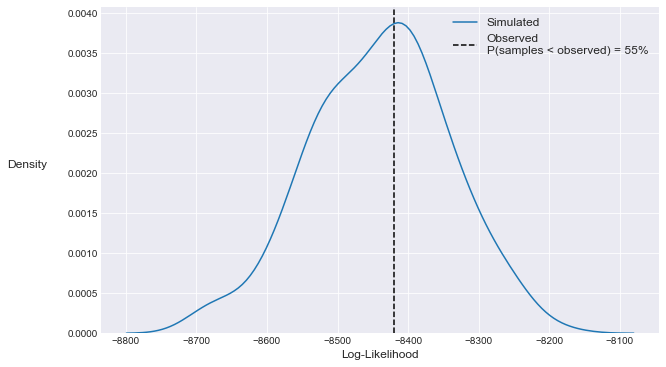

In [9]:
# Compute the simulated log likelihoods
sim_log_likes = viz.compute_predictive_log_likelihoods(sim_y, mnl_model.long_fitted_probs)

viz.plot_continous_scalars(sim_log_likes,
                           mnl_model.llf,
                           figsize=(10, 6),
                          )

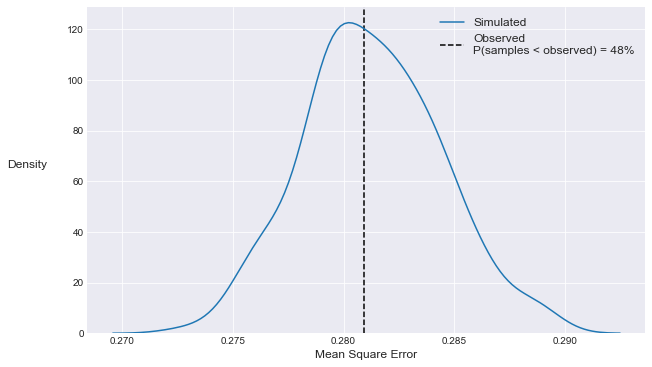

In [10]:
# Compute the simulated mean square errors
sim_mse = viz.compute_predictive_mse(sim_y, mnl_model.long_fitted_probs)

# Compute the observed mean square errors
obs_mse = viz.compute_predictive_mse(mnl_model.choices[:, None], mnl_model.long_fitted_probs)[0]

viz.plot_continous_scalars(sim_mse,
                           obs_mse,
                           figsize=(10, 6),
                           x_label='Mean Square Error',
                          )

### 1A. Look by alternative

Automatic pdb calling has been turned ON


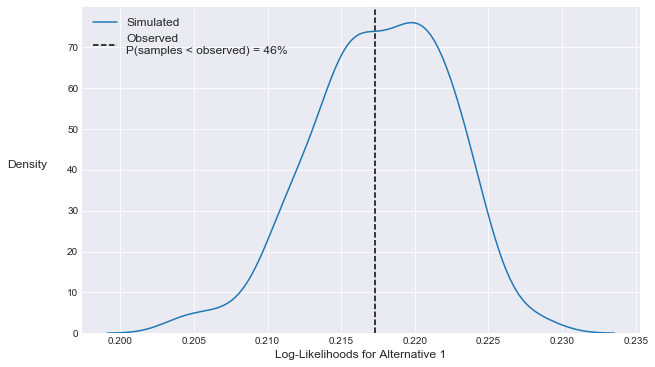

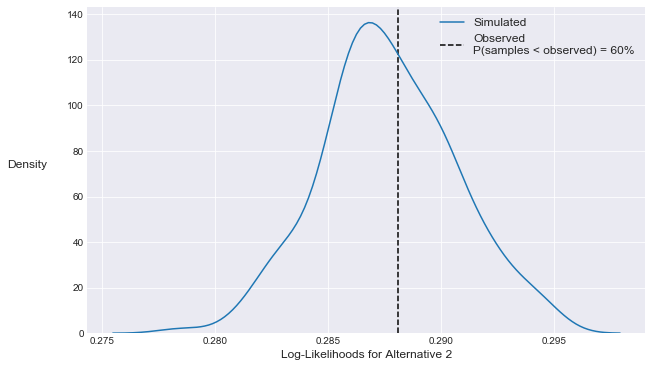

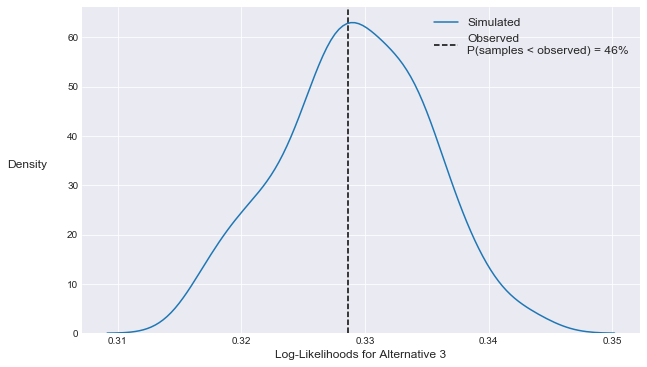

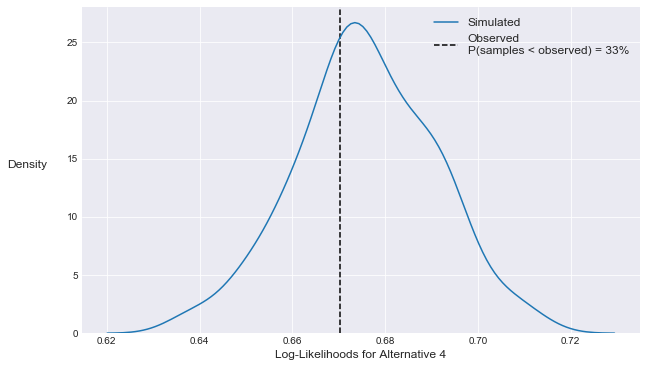

In [11]:
%pdb on

train_alternative_ids = train_df_all[ALT_ID_COL].values

for alt in np.sort(np.unique(train_alternative_ids)):
    alt_filter = train_alternative_ids == alt

    current_sim_y = sim_y[alt_filter, :]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    current_obs_y = mnl_model.choices[alt_filter]
    
    # Compute the simulated log-likelihoods
    current_sim_log_likes =\
        viz.compute_predictive_mse(
            current_sim_y, current_probs)

    # Compute the observed log-likelihoods
    current_obs_log_likelihood =\
        viz.compute_predictive_mse(
            current_obs_y[:, None], current_probs)[0]

    # Make the plot
    viz.plot_continous_scalars(
        current_sim_log_likes,
        current_obs_log_likelihood,
        figsize=(10, 6),
        x_label='Log-Likelihoods for Alternative {}'.format(alt),
                          )
    

## 2. Market Share plots

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnVW5pcXVlIHgtdmFsdWVzJywgbWF4PTQuMCwgc3R5bGU9UHJvZ3Jlc3NTdHlsZShkZXNjcmlwdGnigKY=


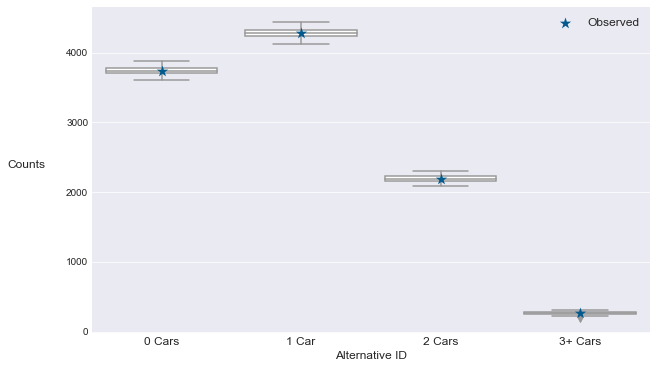

In [12]:
# Look at simulated market shares for each alternative
# These will be well fit automatically since its an MNL with alternative specific constants
viz.plot_simulated_market_shares(
    train_alternative_ids,
    sim_y,
    mnl_model.choices,
    x_label='Alternative ID',
    display_dict=choice_labels,
)

## 3. Reliability plots

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcnLCBtYXg9MS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcnLCBtYXg9MS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcnLCBtYXg9MS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcnLCBtYXg9MS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


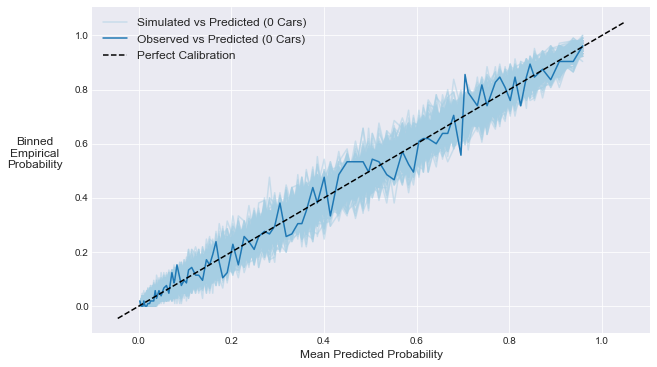

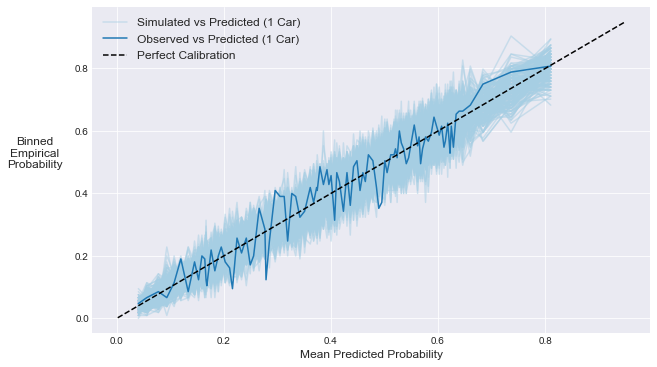

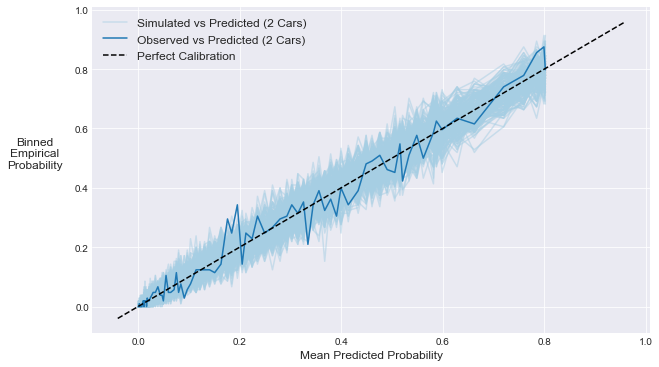

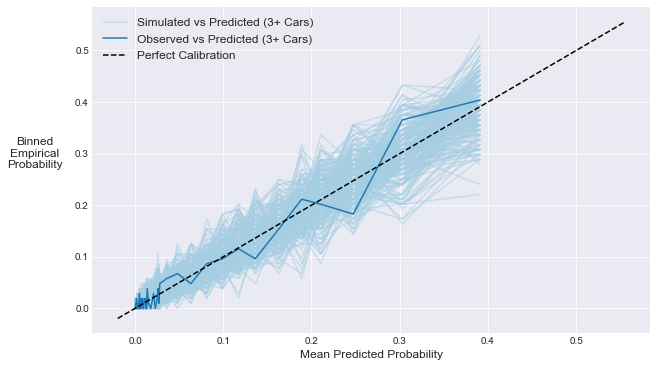

In [13]:
# Look at the reliability plots for each alternative
for alt in np.sort(np.unique(train_alternative_ids)):
    alt_filter = train_alternative_ids == alt
    alt_name = choice_labels[alt]

    current_sim_y = sim_y[alt_filter, :]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    current_obs_y = mnl_model.choices[alt_filter]
    
    current_line_label =\
        'Observed vs Predicted ({})'.format(alt_name)
    current_sim_line_label =\
        'Simulated vs Predicted ({})'.format(alt_name)
    
    viz.plot_smoothed_reliability(
        current_probs,
        current_obs_y,
        sim_y=current_sim_y,
        discrete=True,
        partitions=100,
        figsize=(10, 6),
        line_label=current_line_label,
        sim_label=current_sim_line_label,
    )

## 4. Marginal Model Plots and Simulated histograms
Use plots to search for discrete interactions by making new features / predictors out of two and three variable sets of categorical variables.

To make the new variables:
- build an Extremely Randomized Tree ensemble where
  - inputs = the sets of categorical variables
  - targets = gradients of the log-likelihood with respect to the systematic utilities for each person
- use the predicted gradients as one's new variable.

Simulated histograms are then used to visualize the marginal relationships with these new discrete variables.

In hindsight the procedure above is unnecessary since I stopped at combinations of two variables and could have simply enumerated the cross-product of each pair of categorical variables. However, the procedure above would scale gracefully to any number and type of variables being combined together (with some adjustment for the type of plot made at the end if combining discrete and categorical variables).

For continuous variables, use Marginal Model Plots to assess how well their marginal relationships are fit.


### 4A. Univariate plots

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUGxvdHRpbmcgU2ltdWxhdGlvbnMnLCBtYXg9MjAwLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGXigKY=


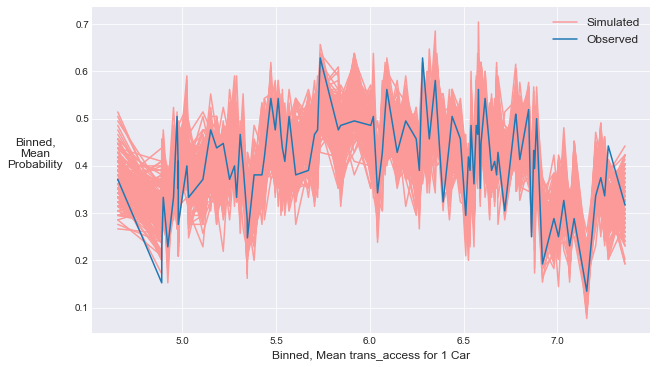

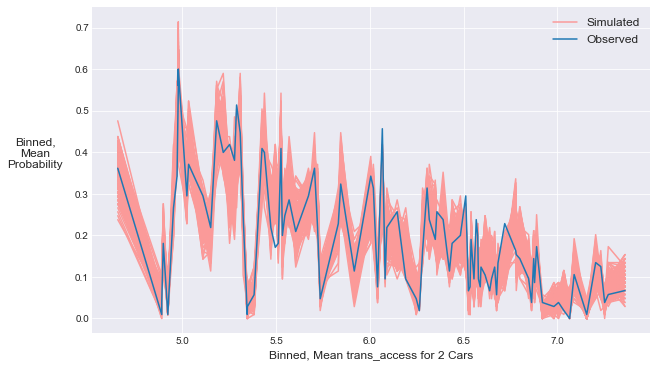

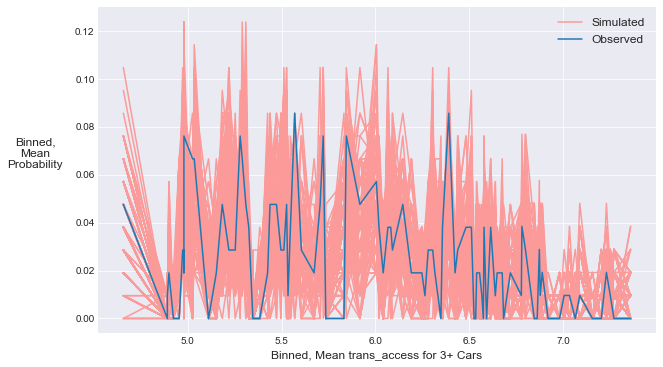

In [14]:
# Look at the marginal model plots of transit access for each alternative
for design_pos, alt, alt_desc in [(-6, 2, '1 Car'),
                                  (-5, 3, '2 Cars'),
                                  (-4, 4, '3+ Cars')]:
    alt_filter = train_alternative_ids == alt
    alt_name = choice_labels[alt]

    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_x = mnl_model.design[alt_filter, :][:, design_pos]
    
    current_line_label =\
        'Observed vs Predicted ({})'.format(alt_name)
    current_sim_line_label =\
        'Simulated vs Predicted ({})'.format(alt_name)
    
    viz.plot_smoothed_marginal(
        current_sim_y,
        current_obs_y,
        current_x,
        discrete=True,
        partitions=100,
        figsize=(10, 6),
        x_label='Binned, Mean trans_access for {}'.format(alt_name),
    )

### 4B. Bi-variate plots

/Users/tbrathwaite/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


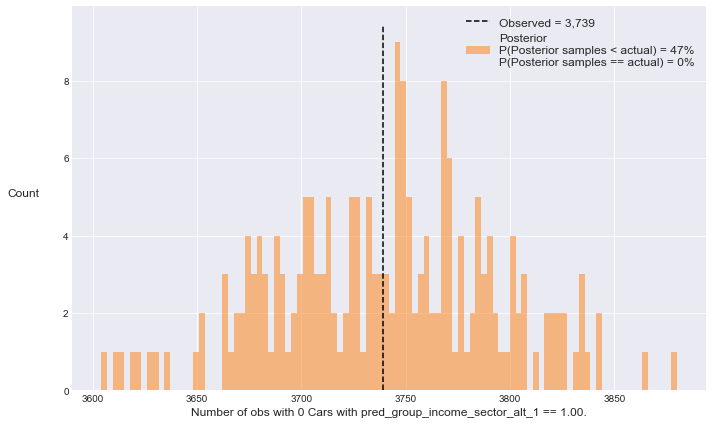

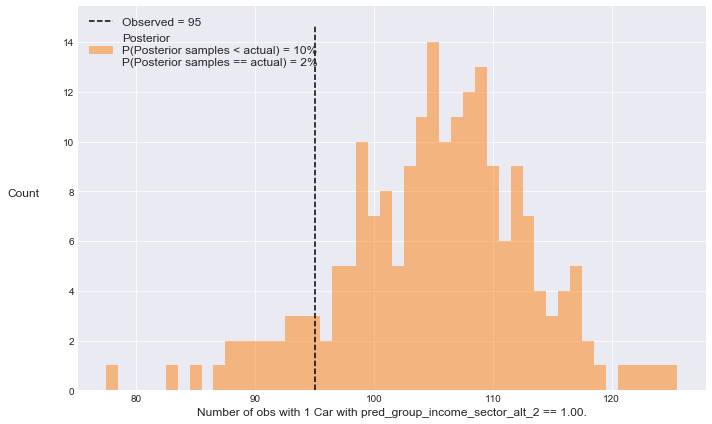

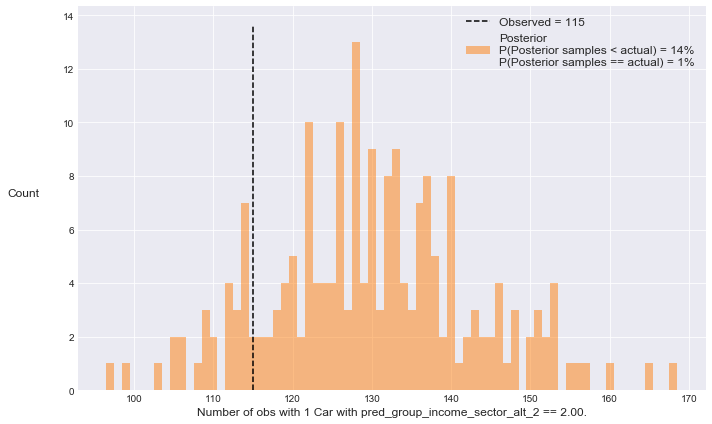

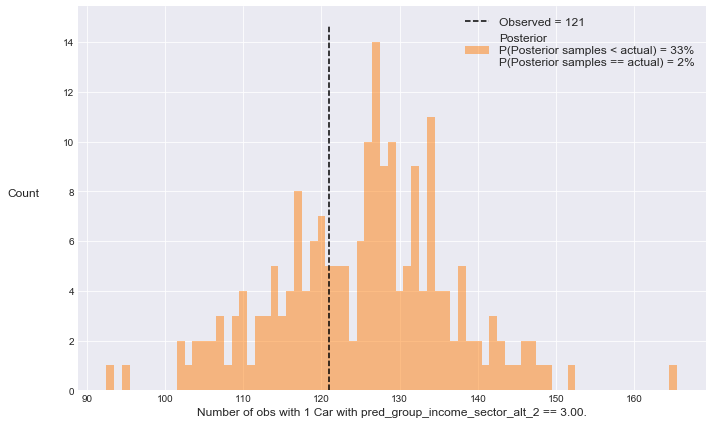

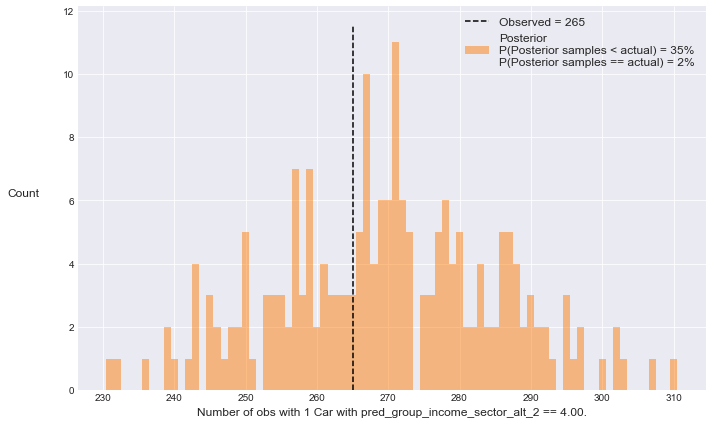

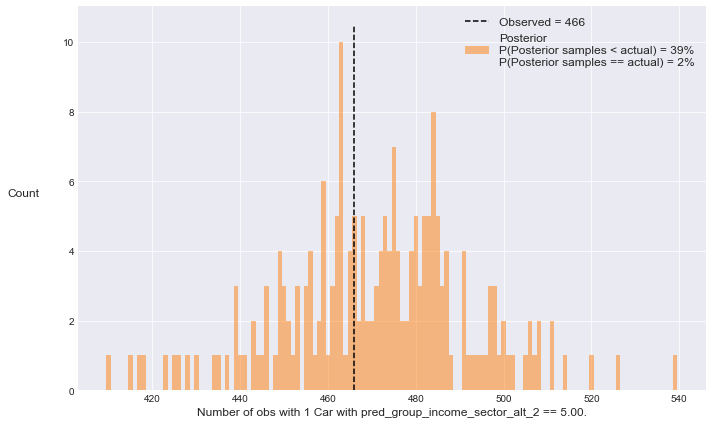

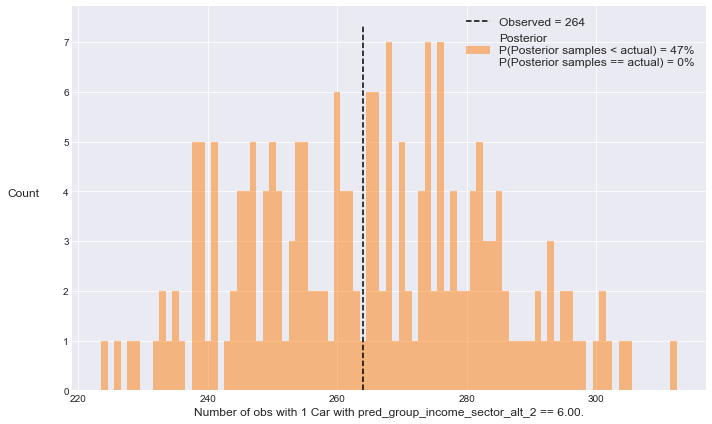

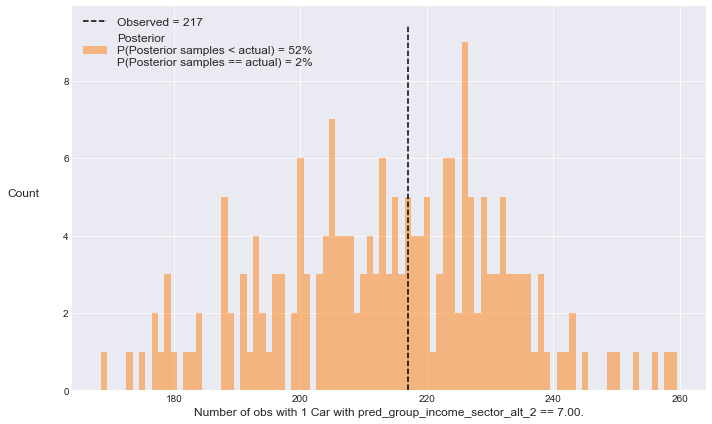

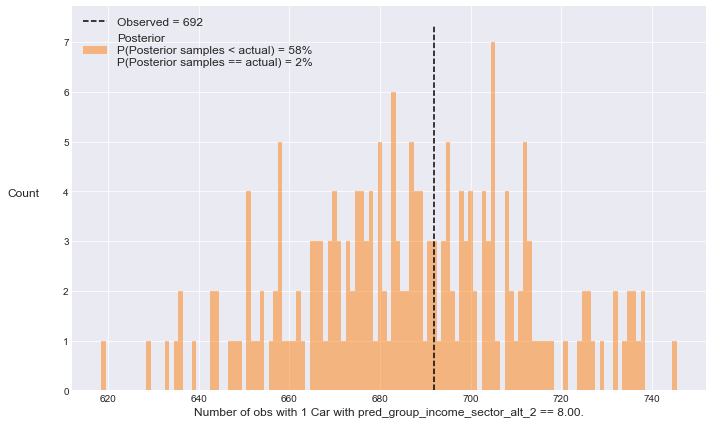

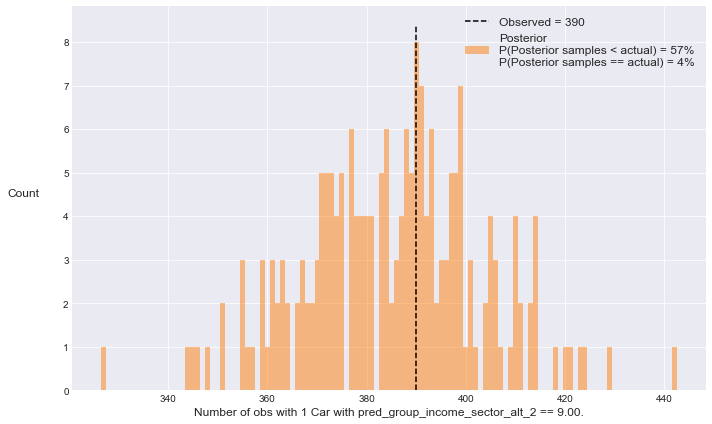

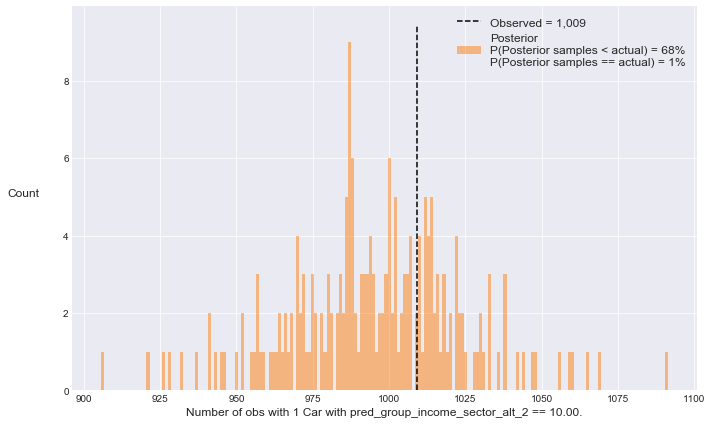

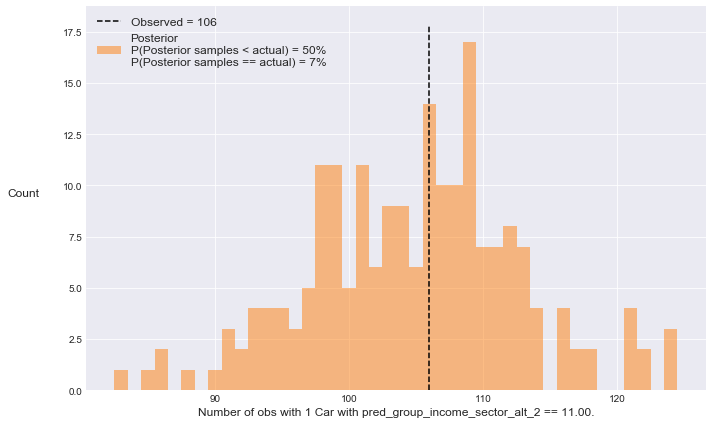

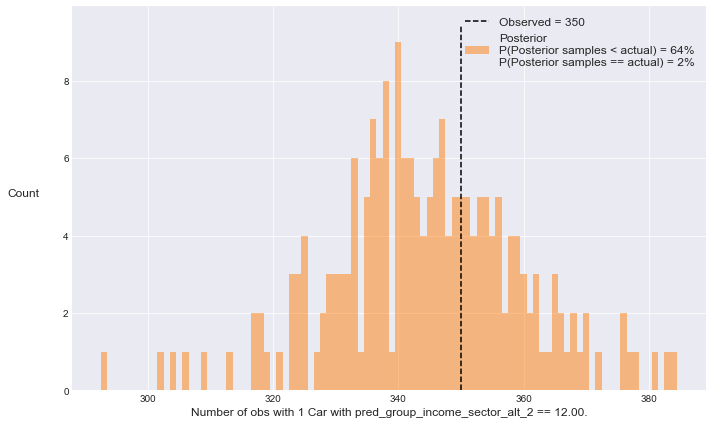

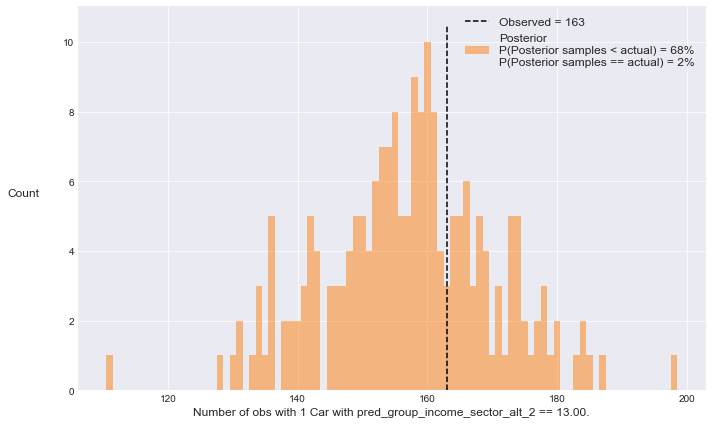

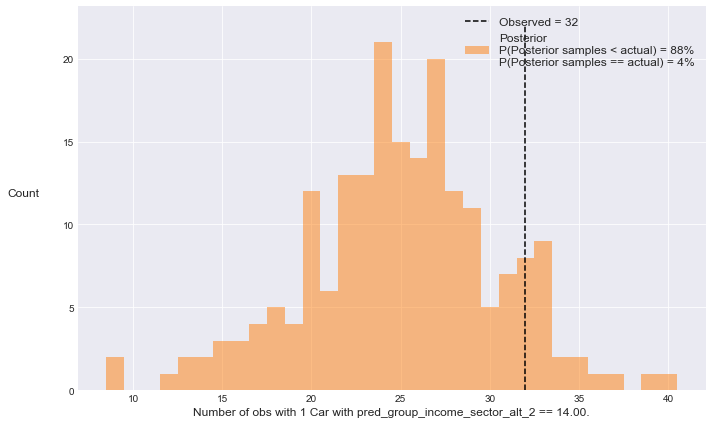

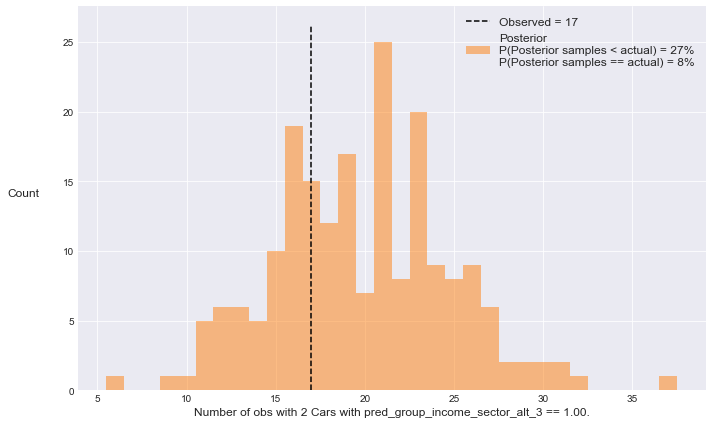

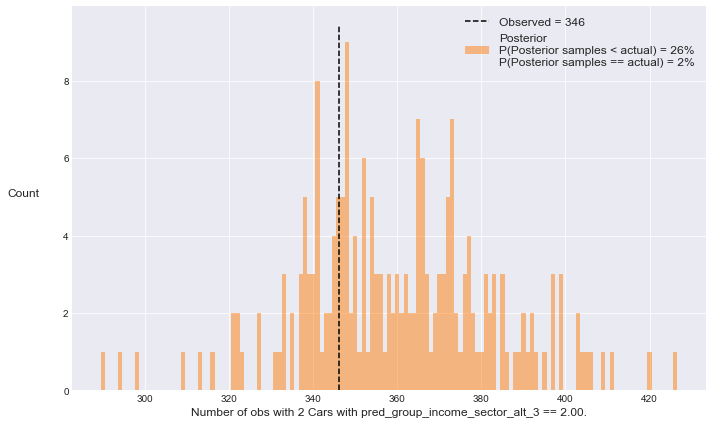

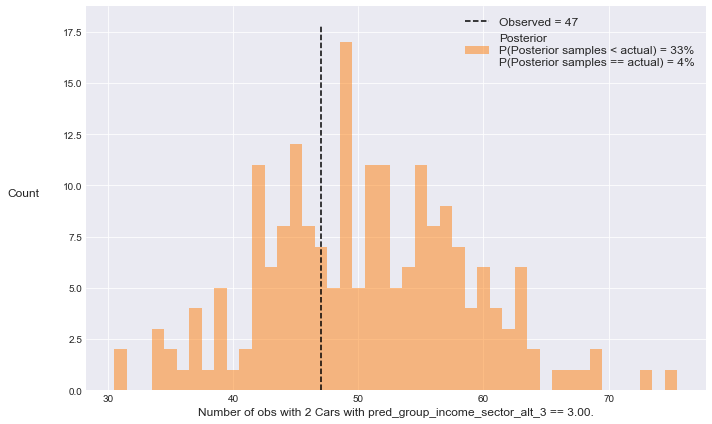

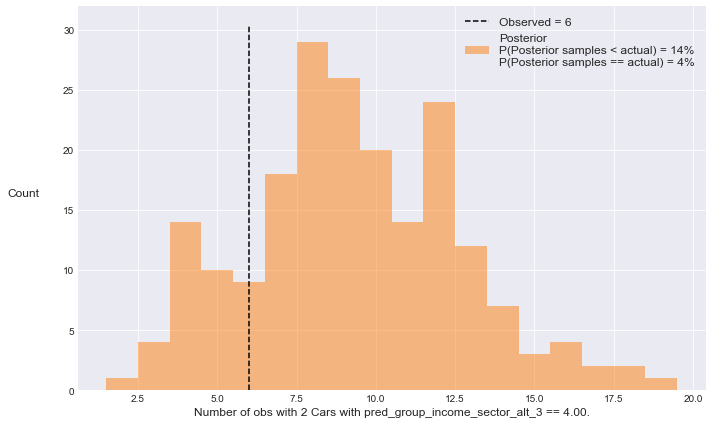

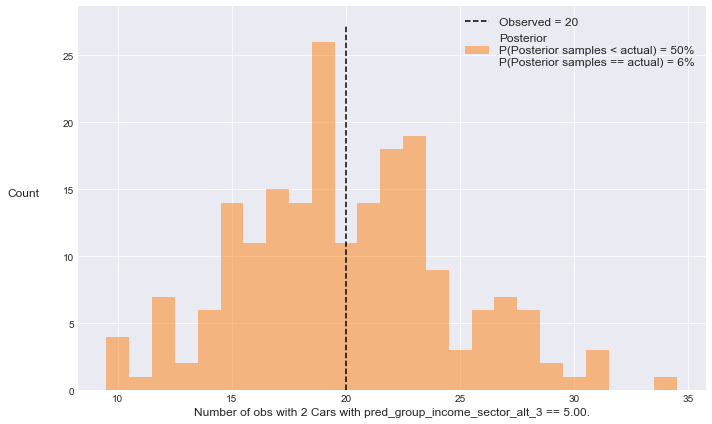

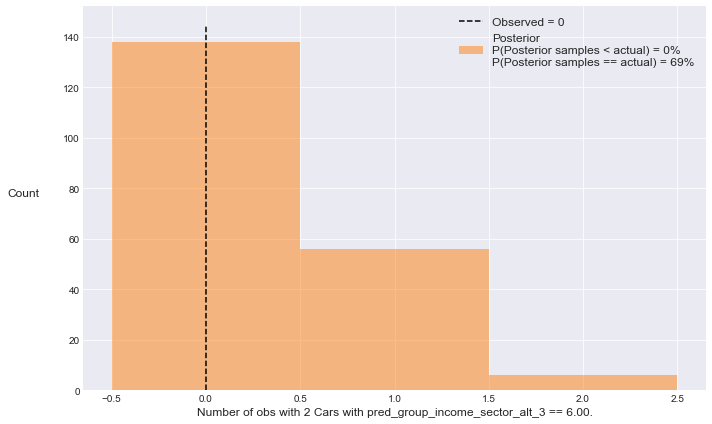

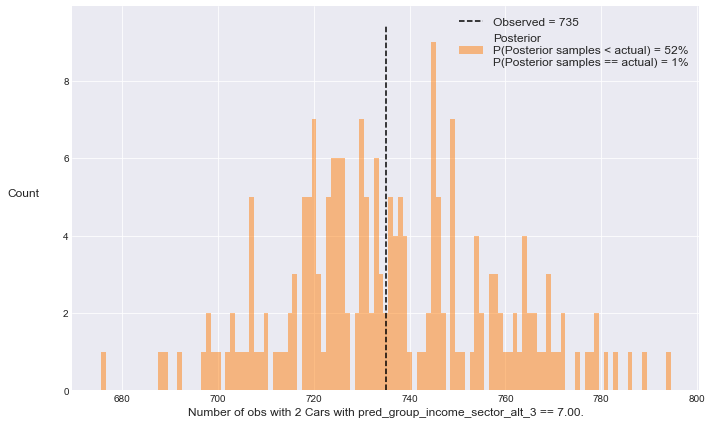

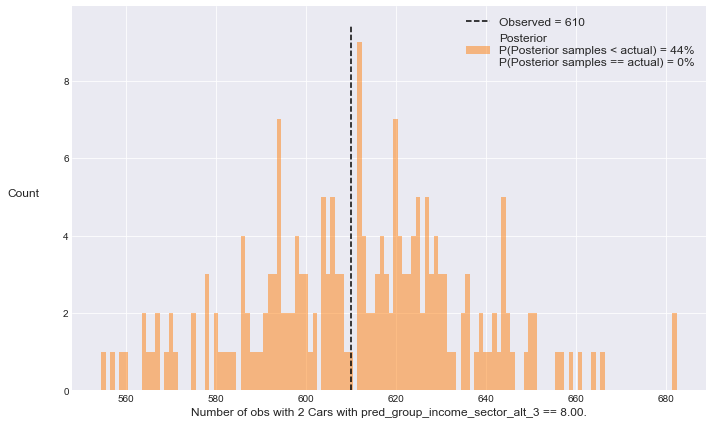

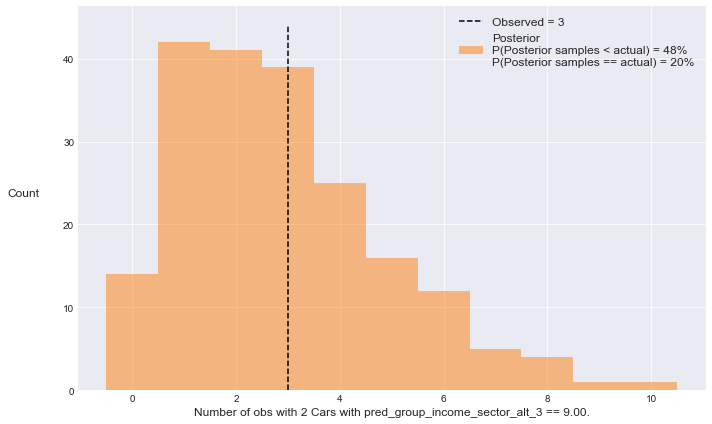

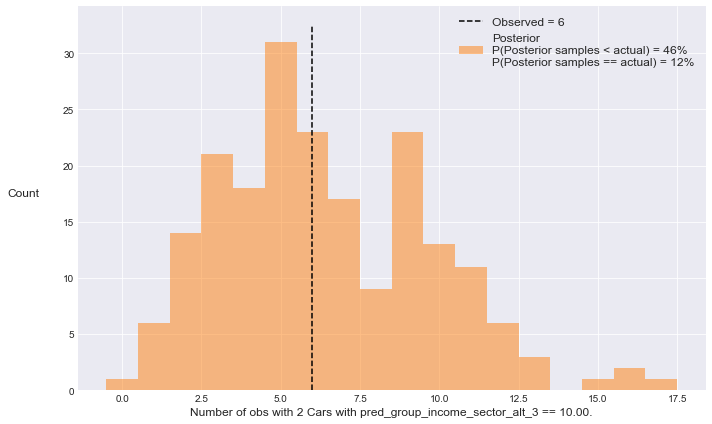

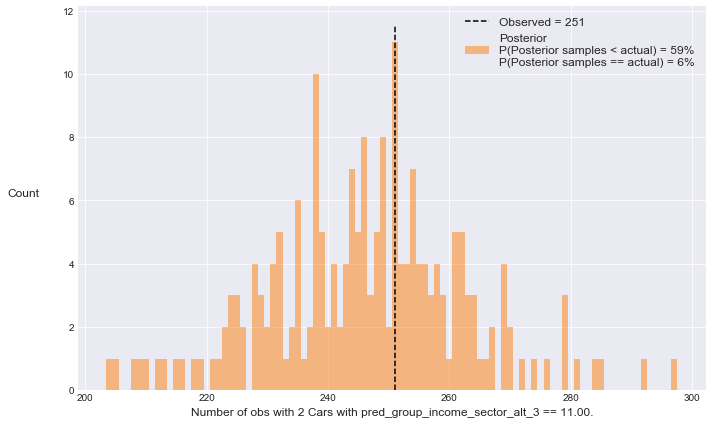

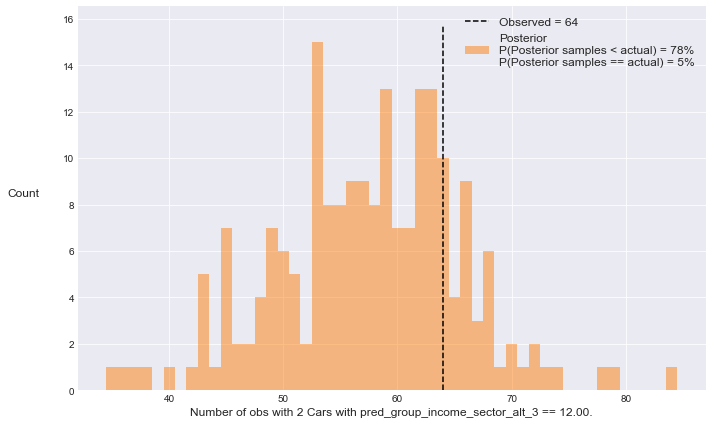

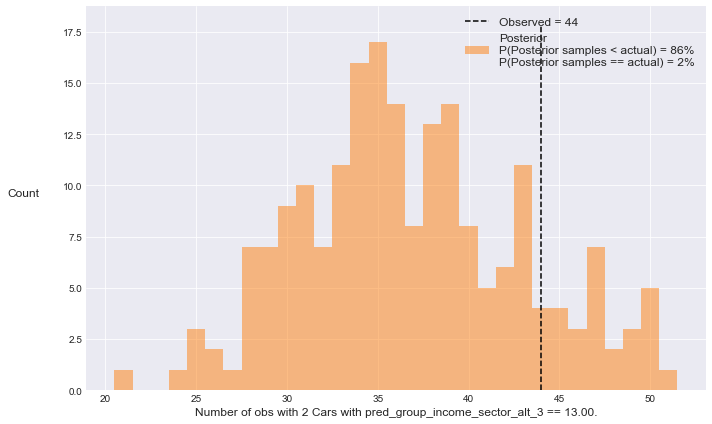

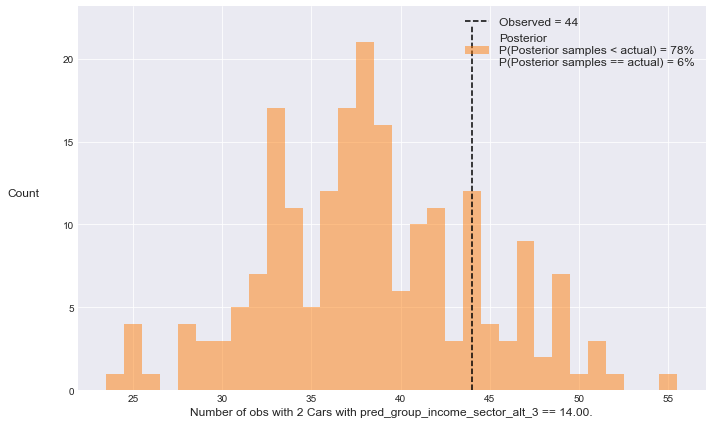

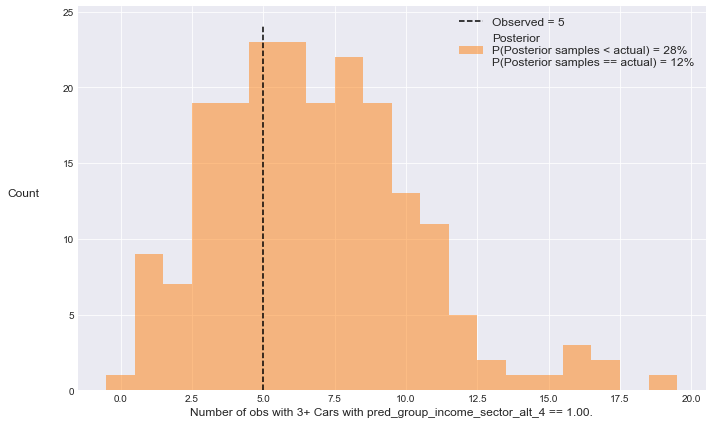

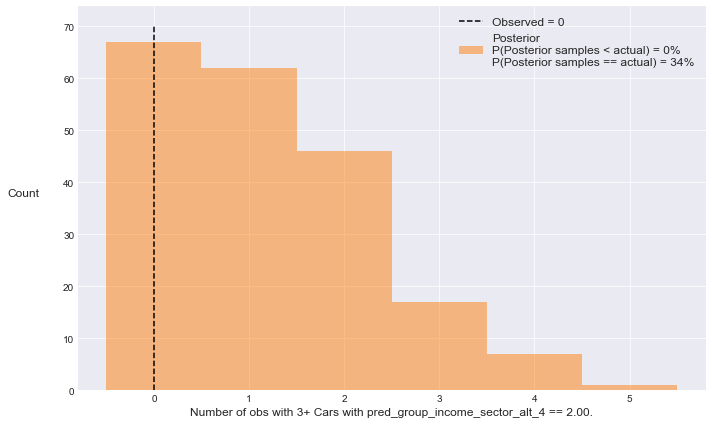

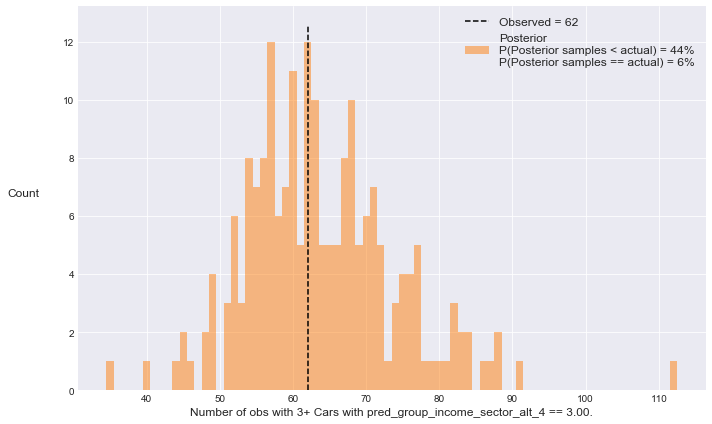

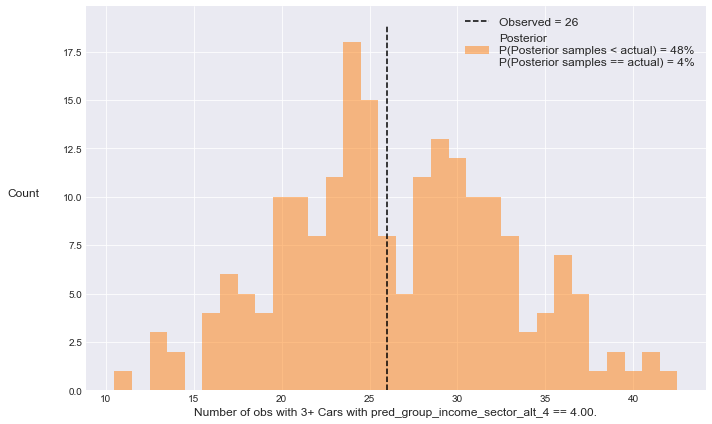

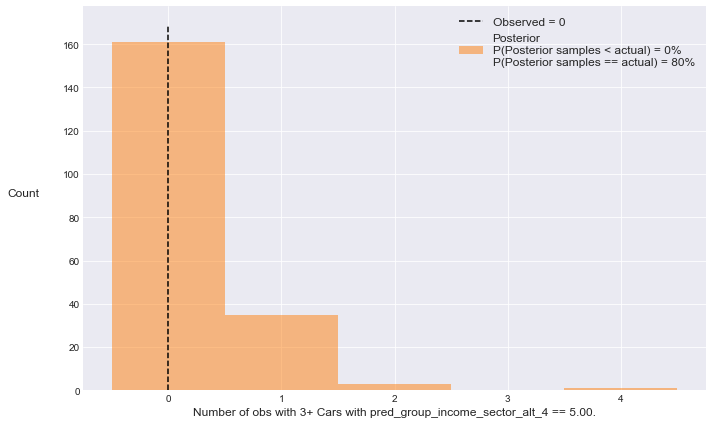

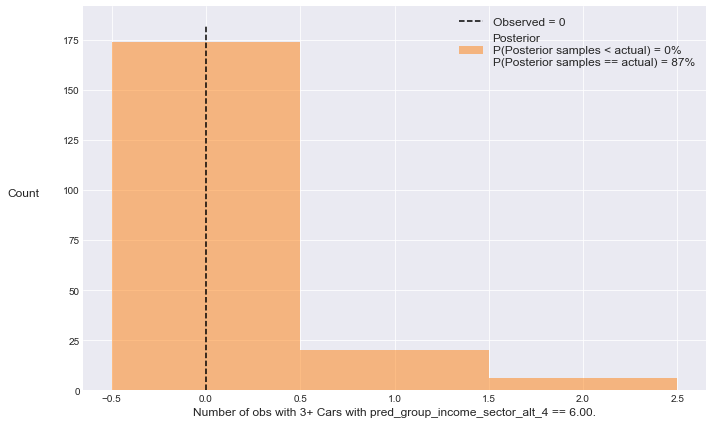

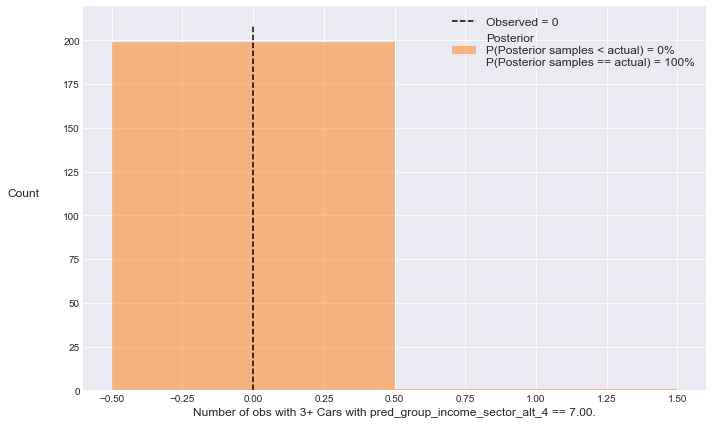

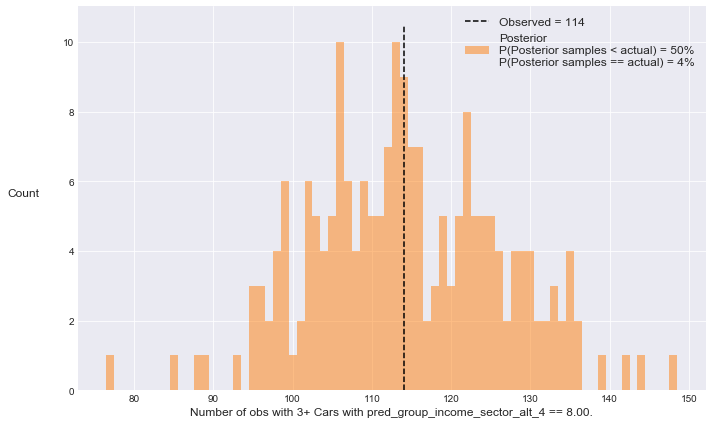

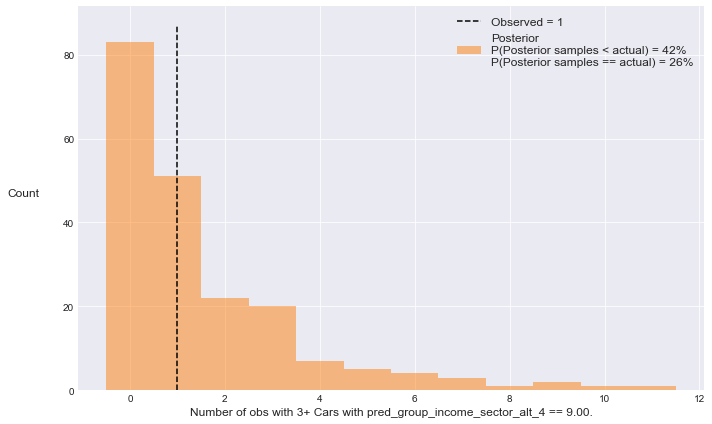

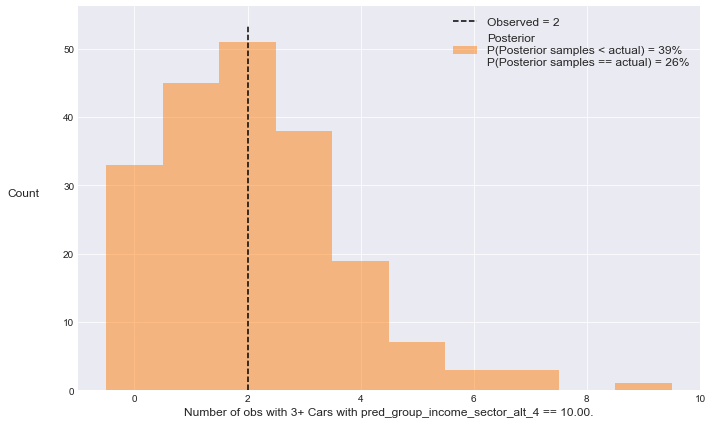

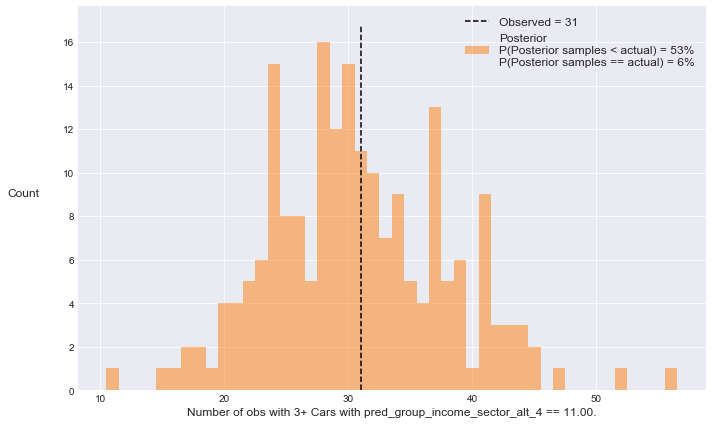

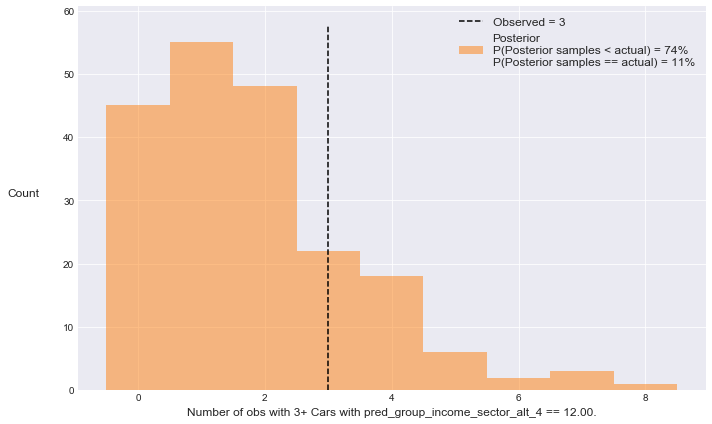

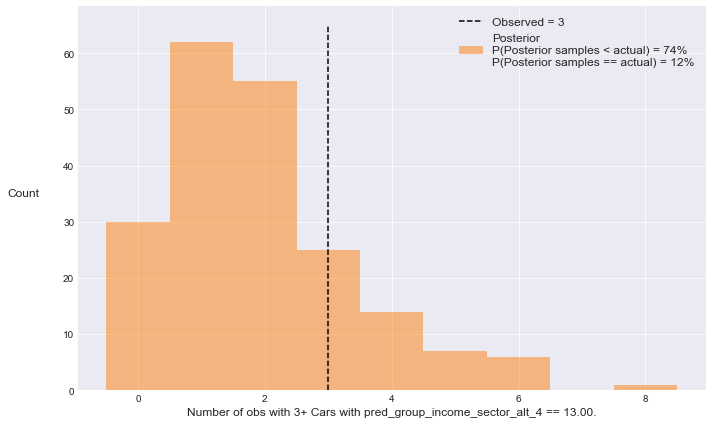

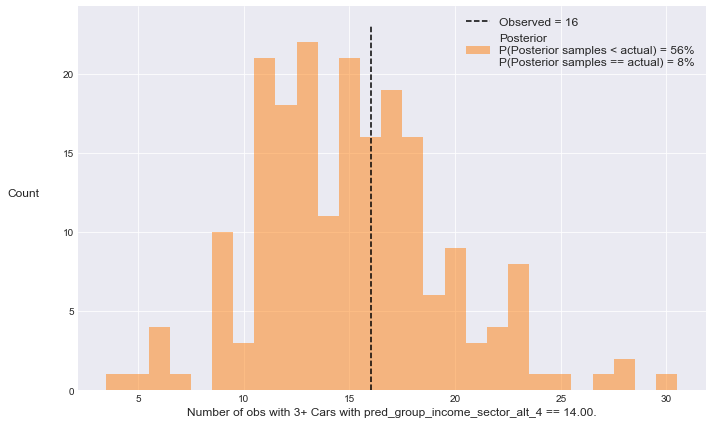

In [15]:
income_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]

cols_to_interact = [income_design_cols, sector_design_cols, adults_design_cols]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = income_design_cols + sector_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=100, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)
    
    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_income_sector_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array
    
    # Make the desired plot    
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

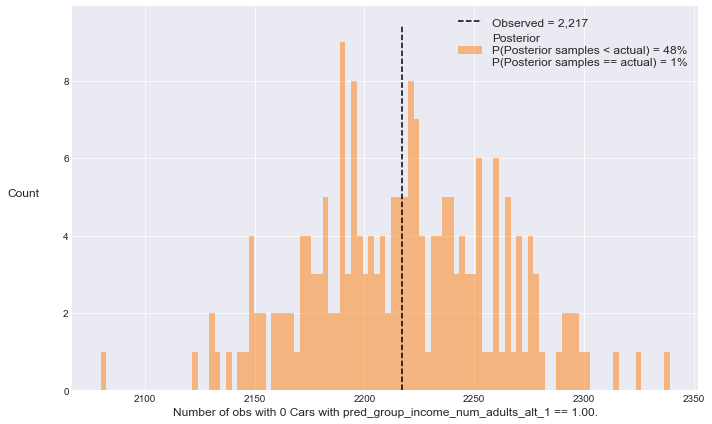

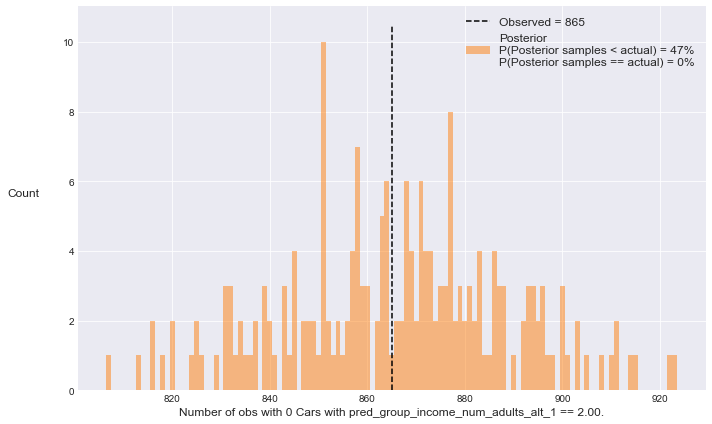

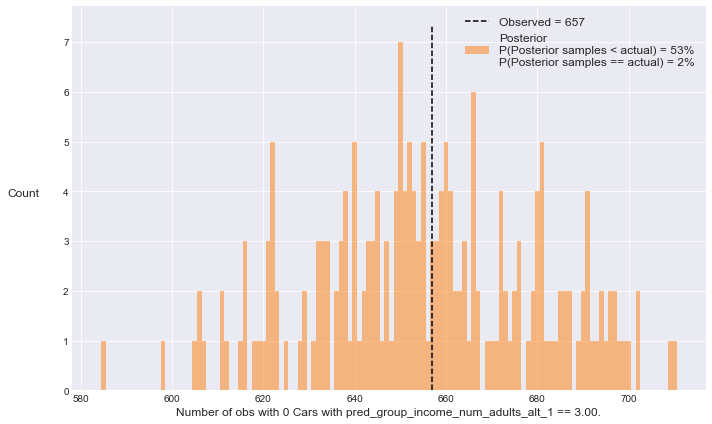

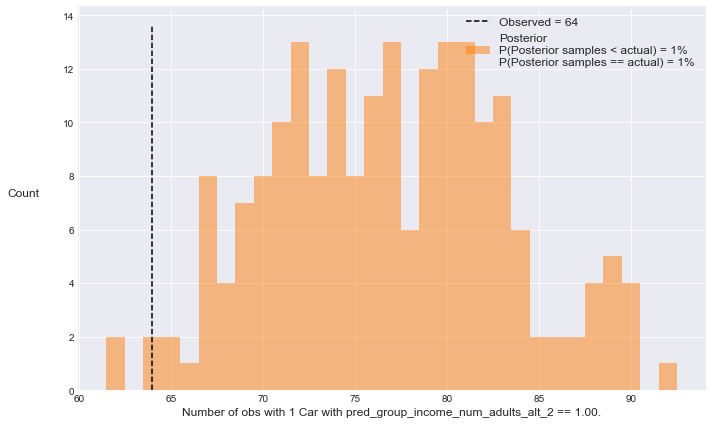

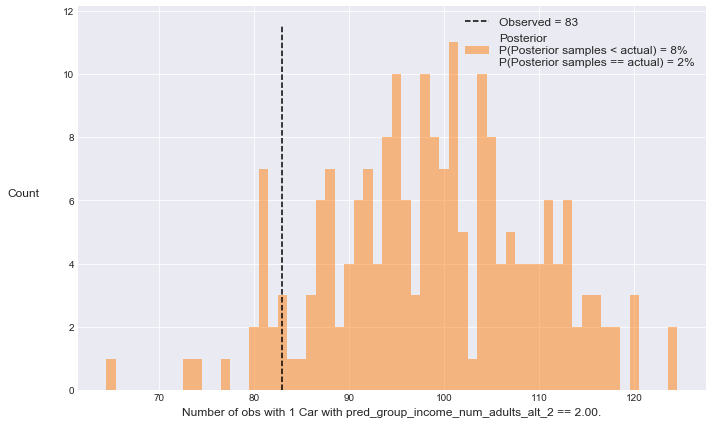

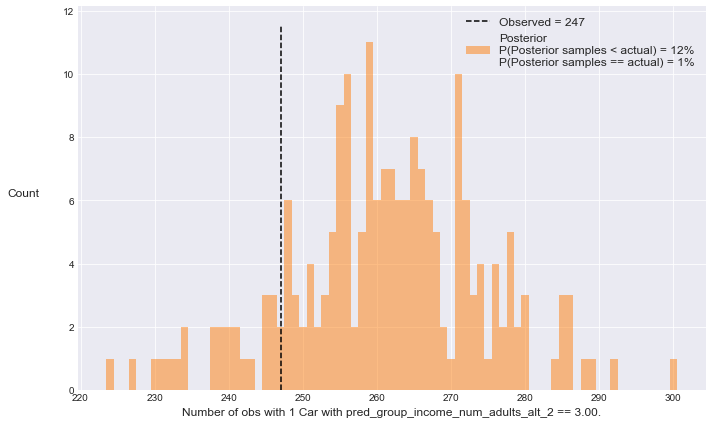

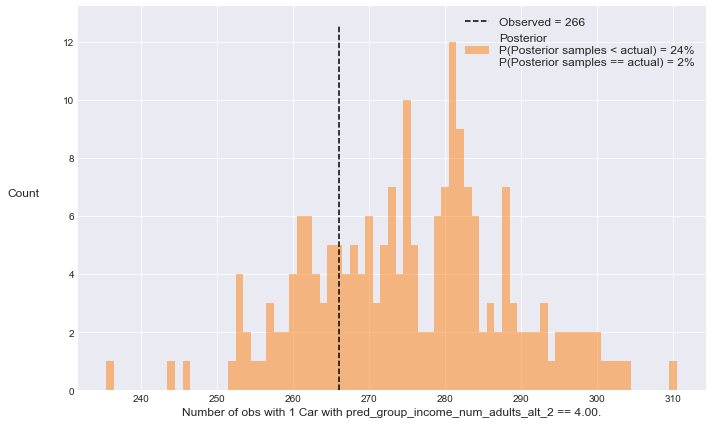

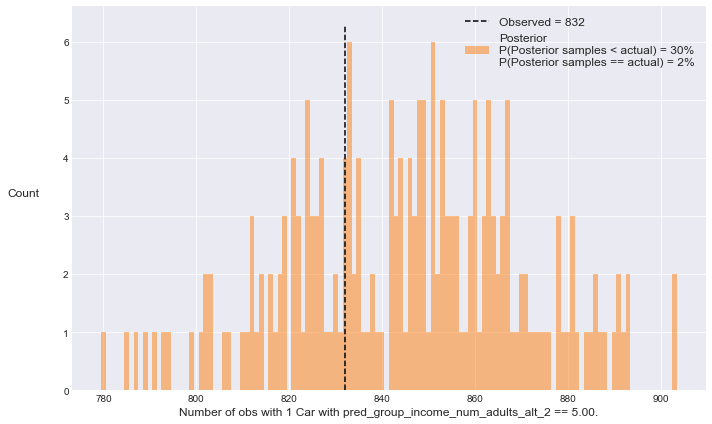

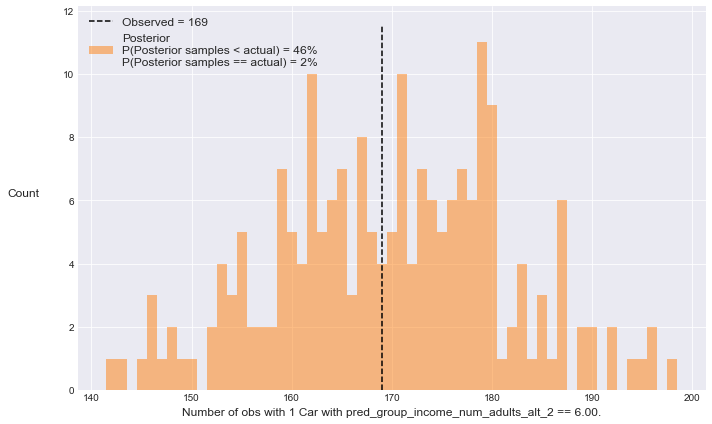

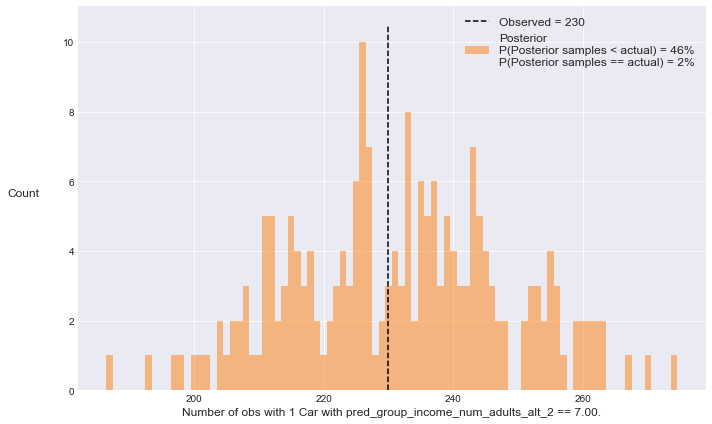

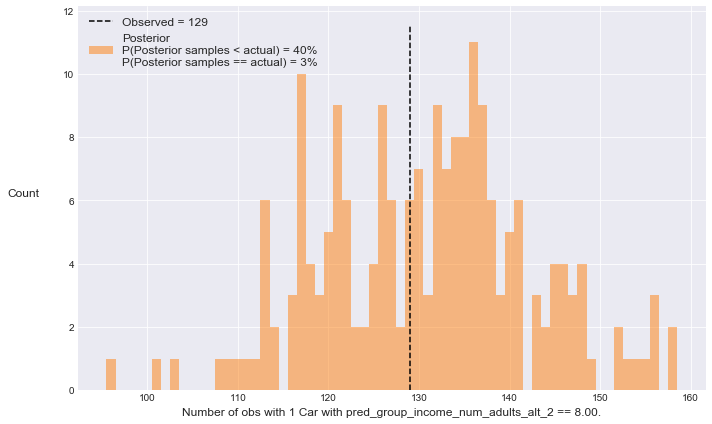

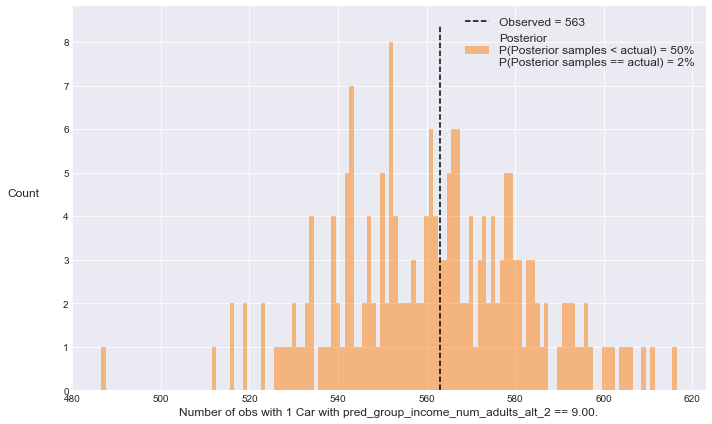

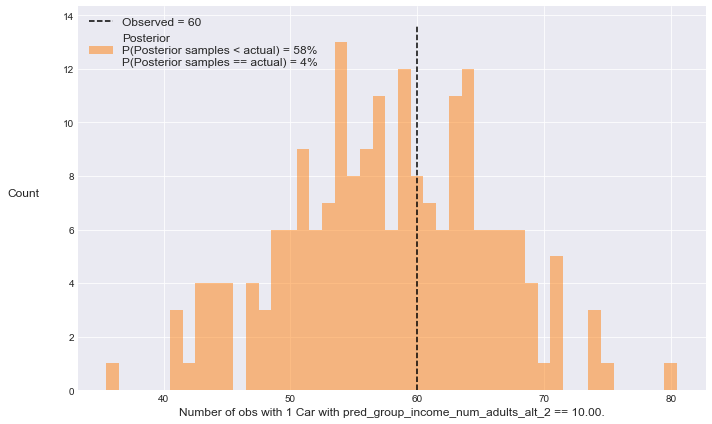

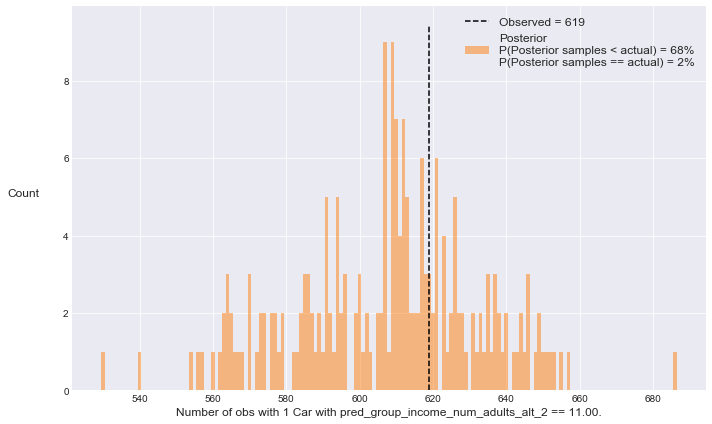

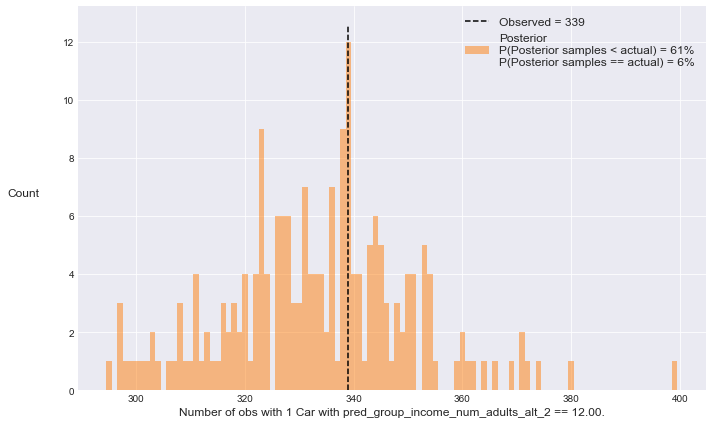

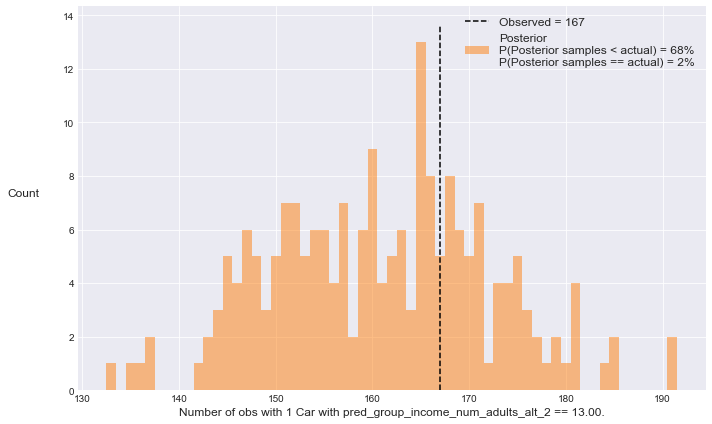

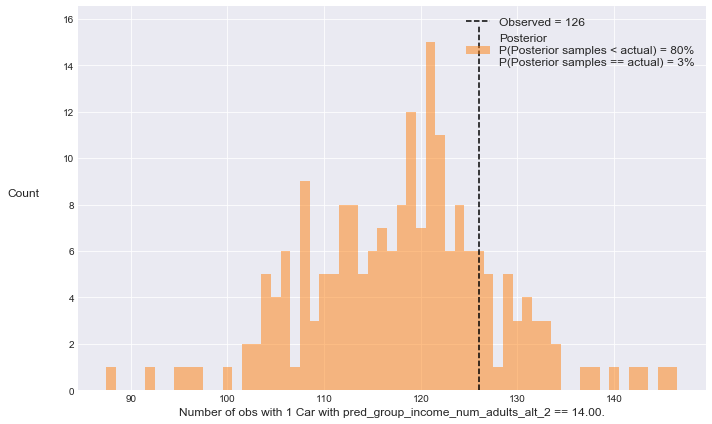

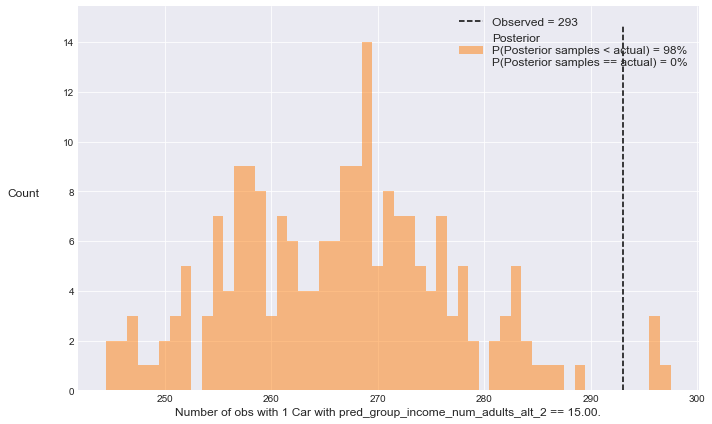

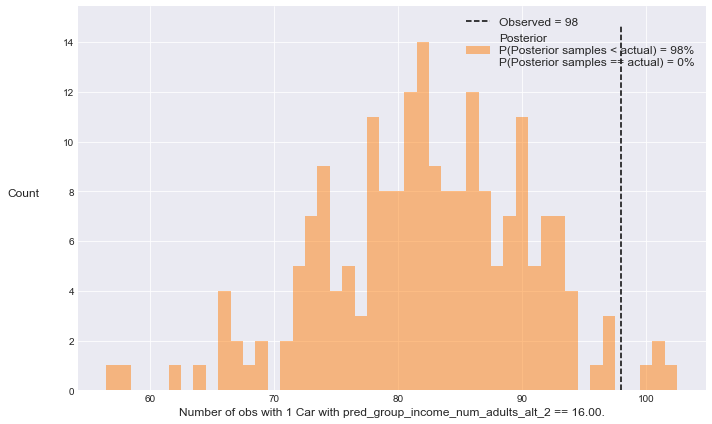

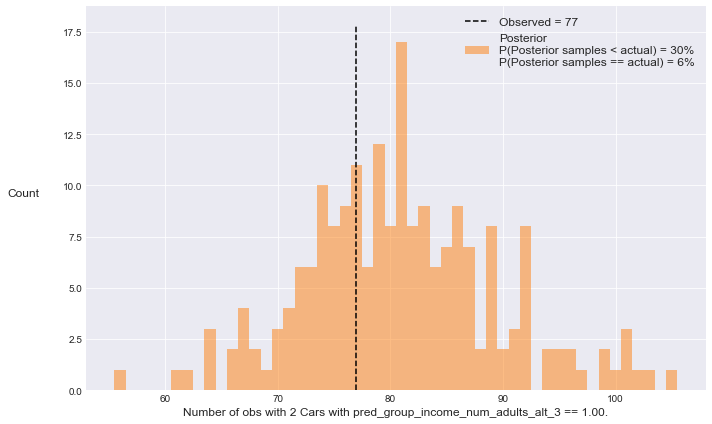

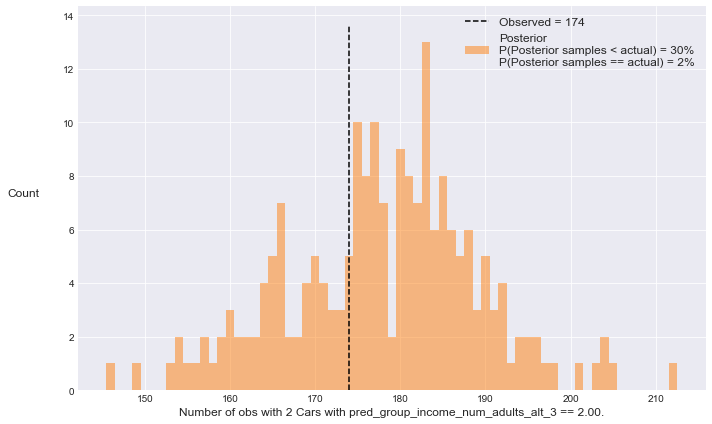

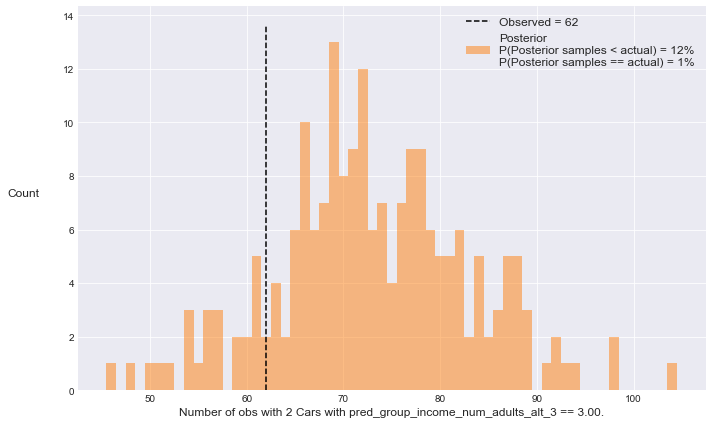

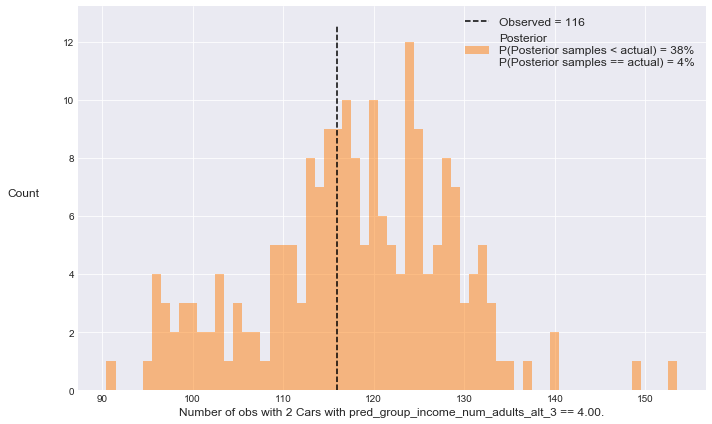

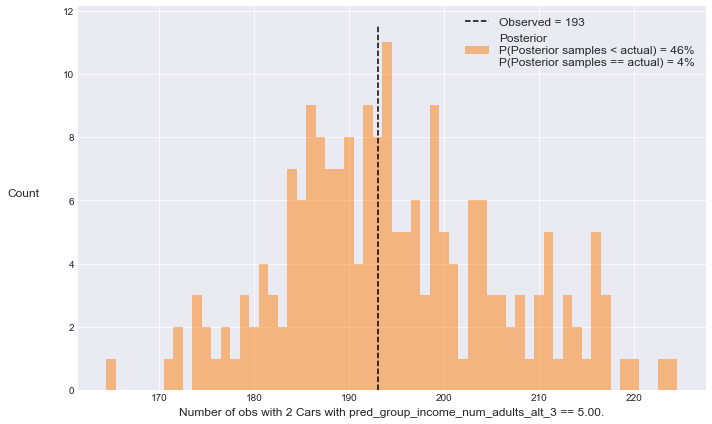

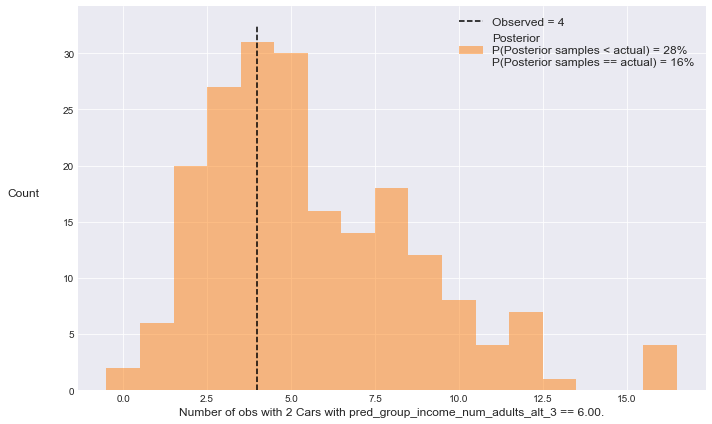

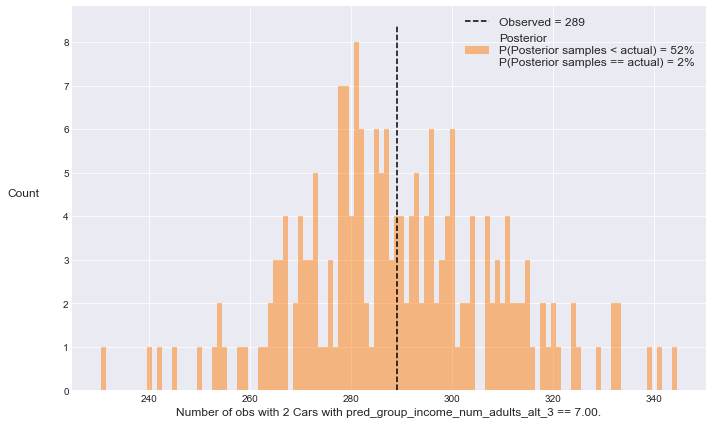

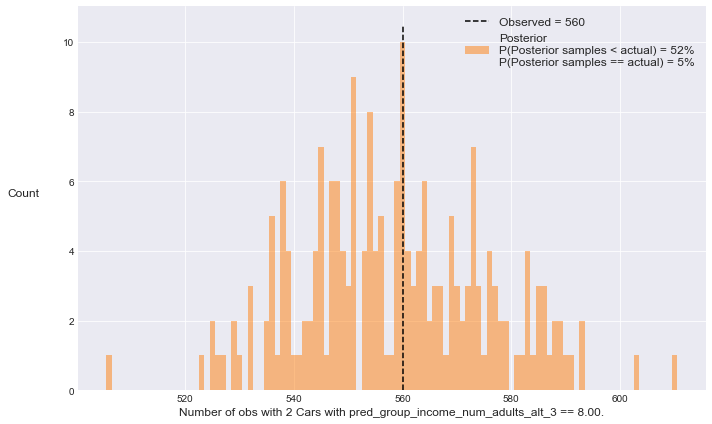

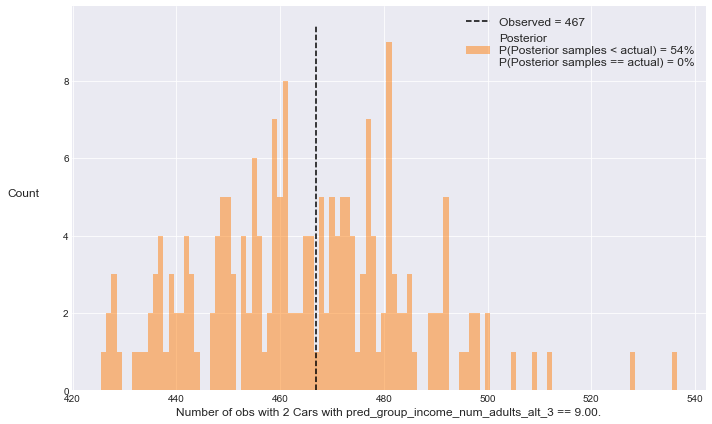

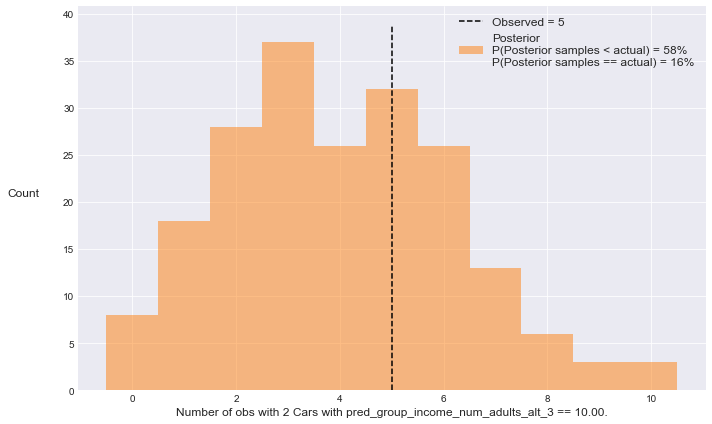

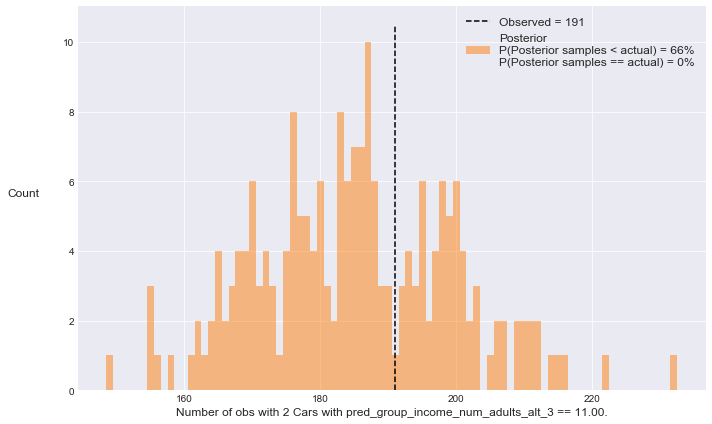

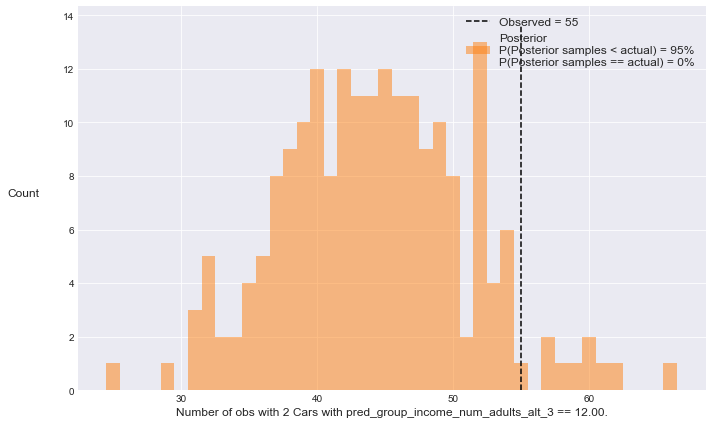

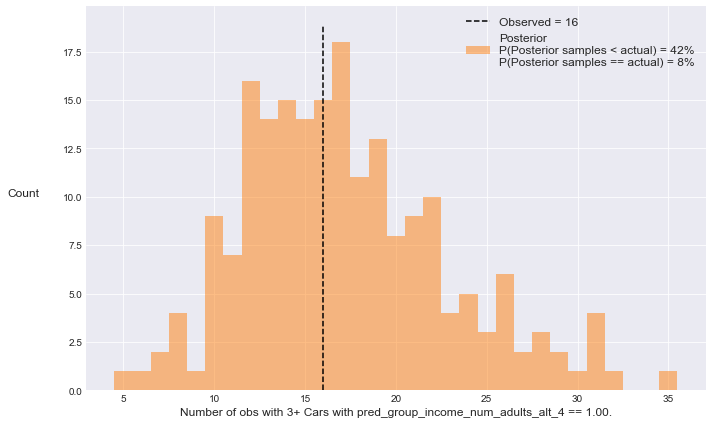

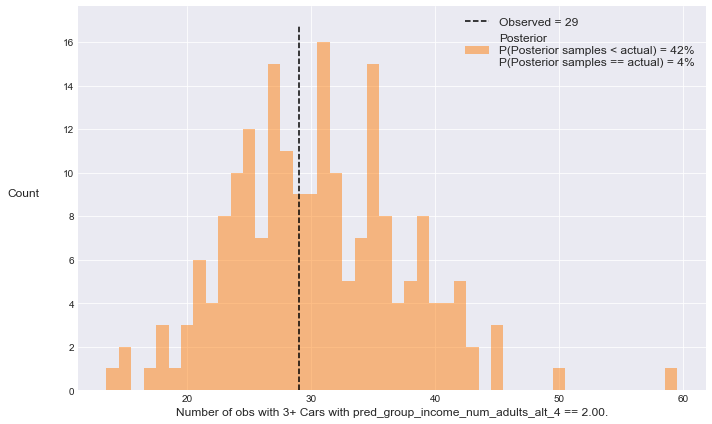

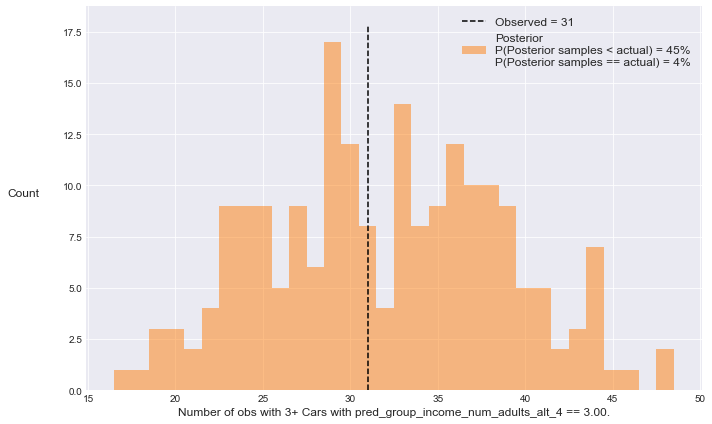

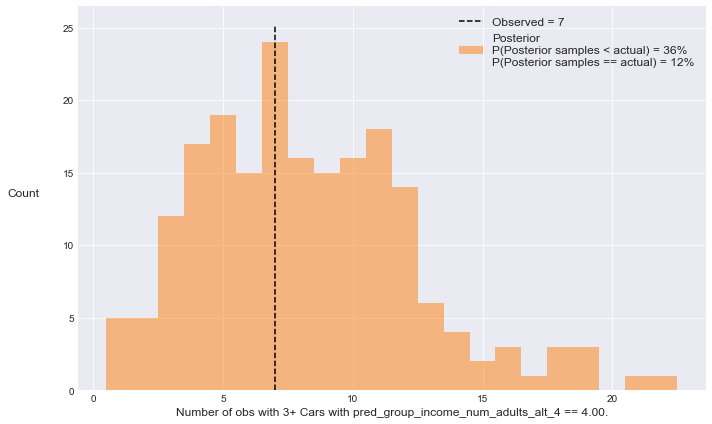

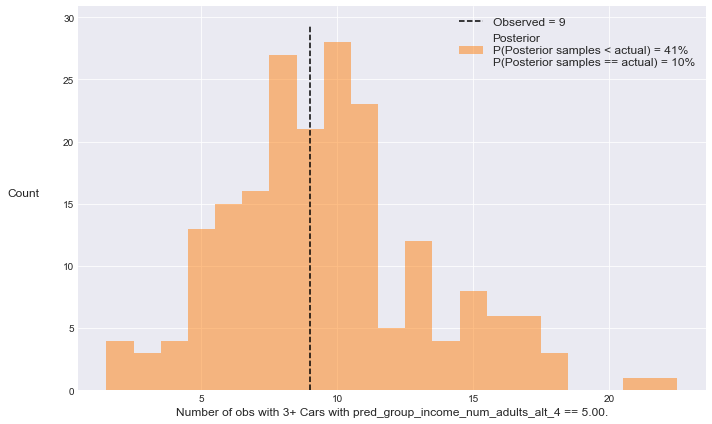

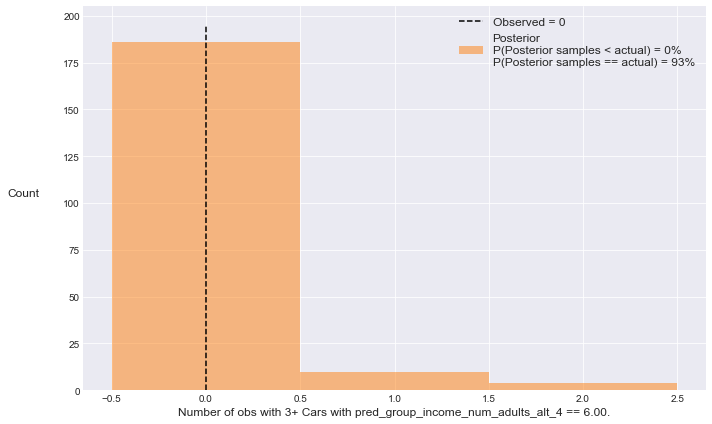

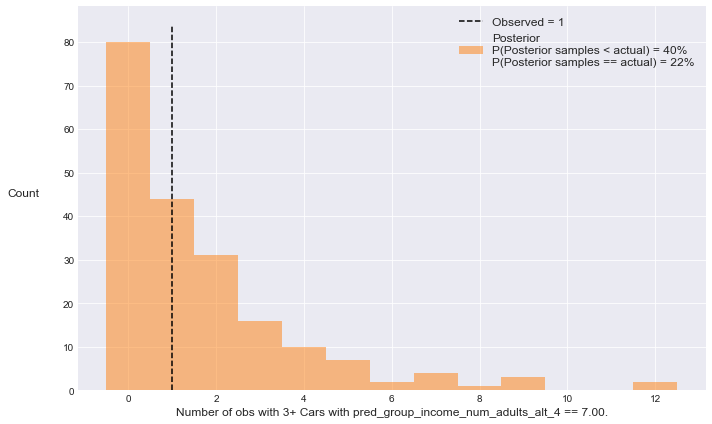

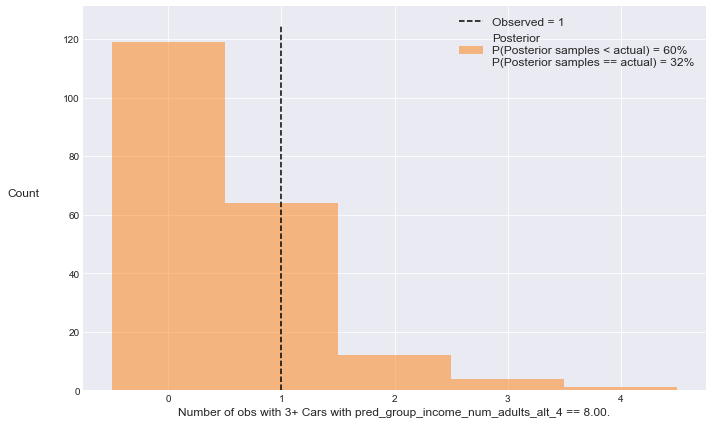

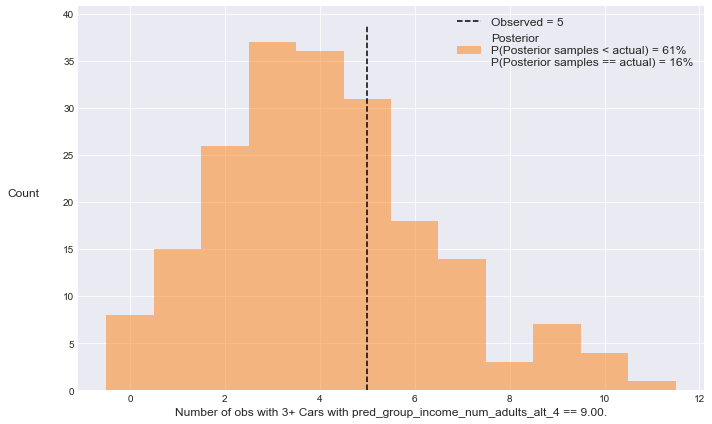

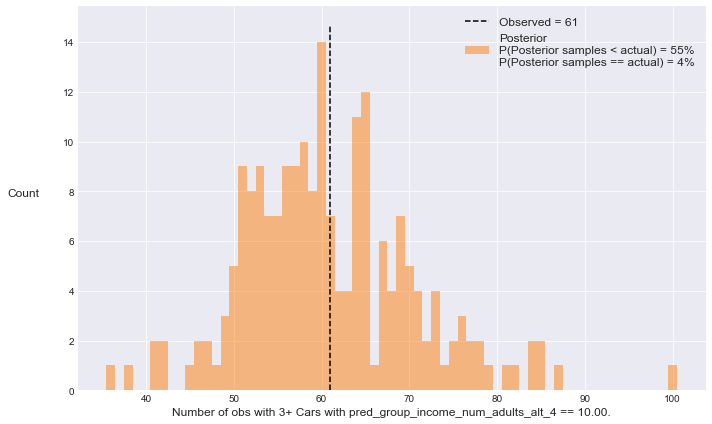

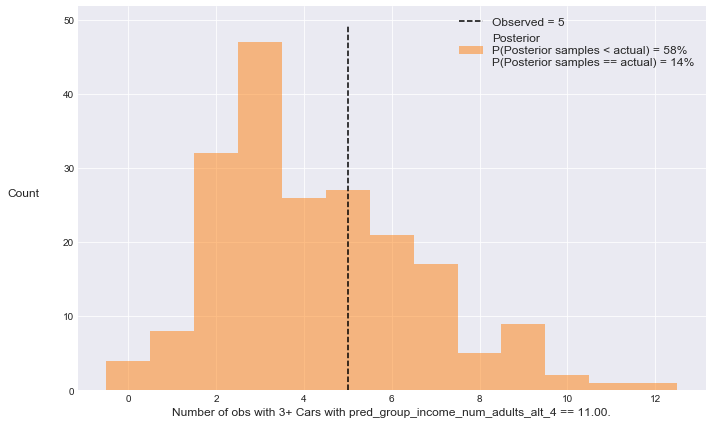

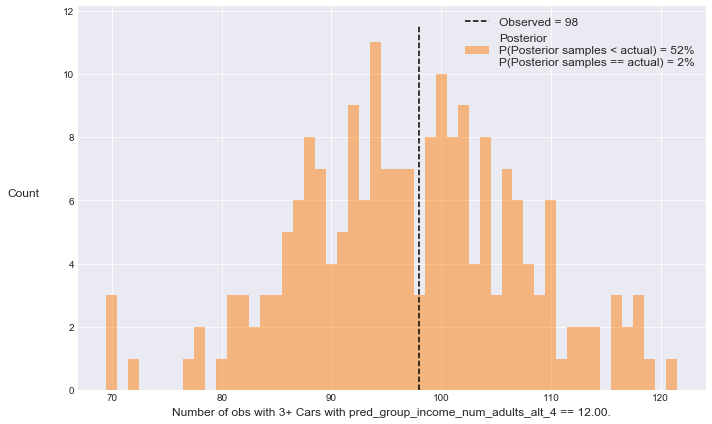

In [16]:
income_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]

cols_to_interact = [income_design_cols, sector_design_cols, adults_design_cols]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = income_design_cols + adults_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=100, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)

    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_income_num_adults_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array

    #Make the desired plot
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

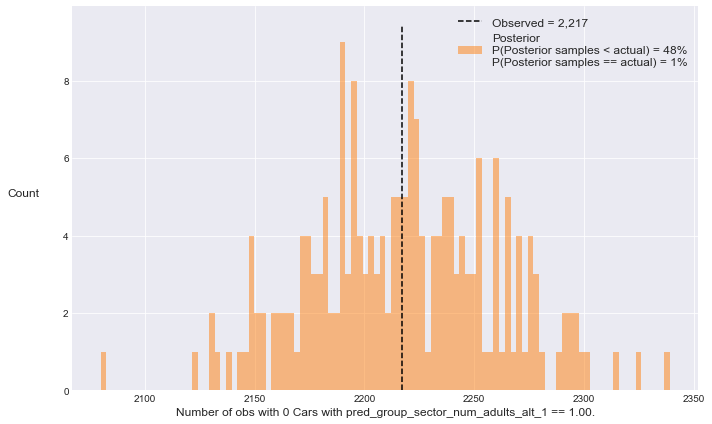

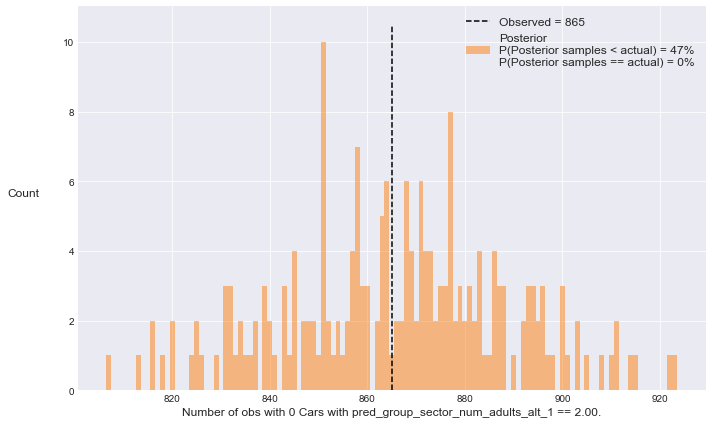

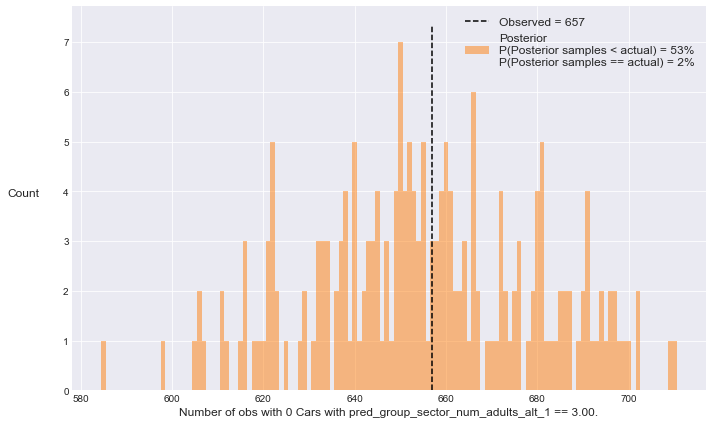

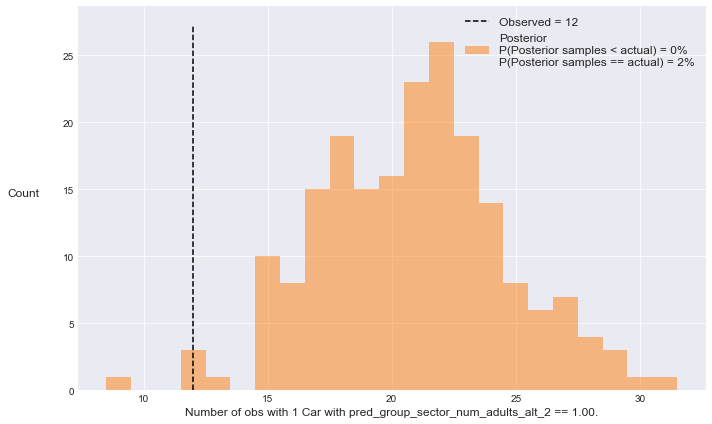

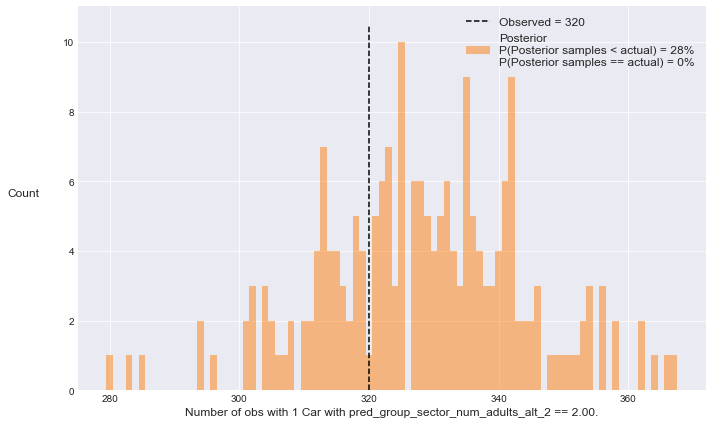

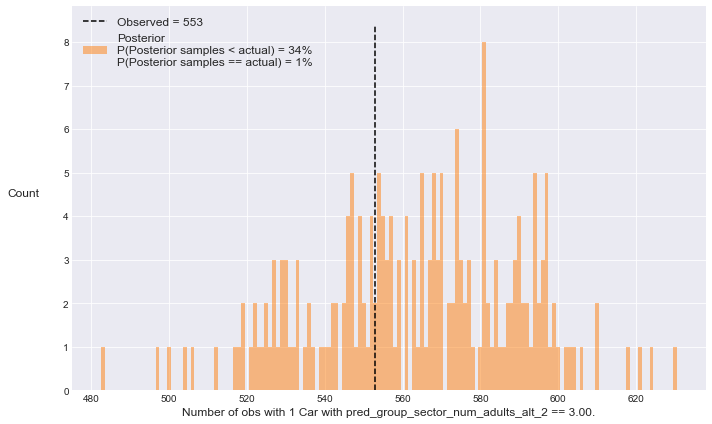

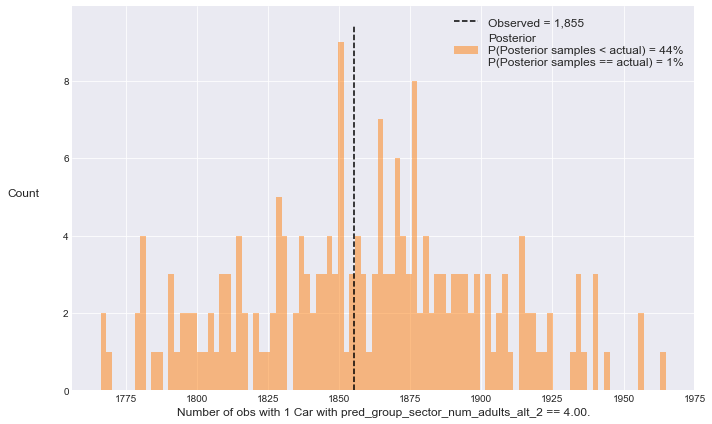

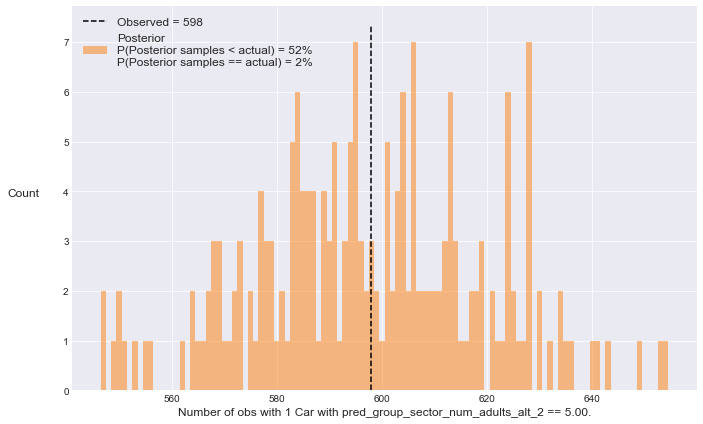

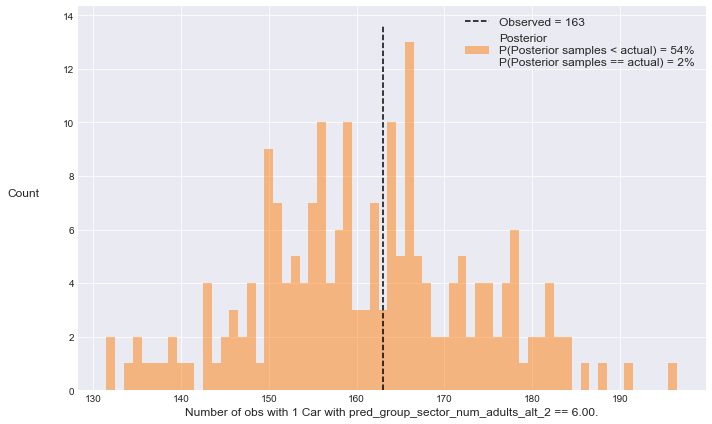

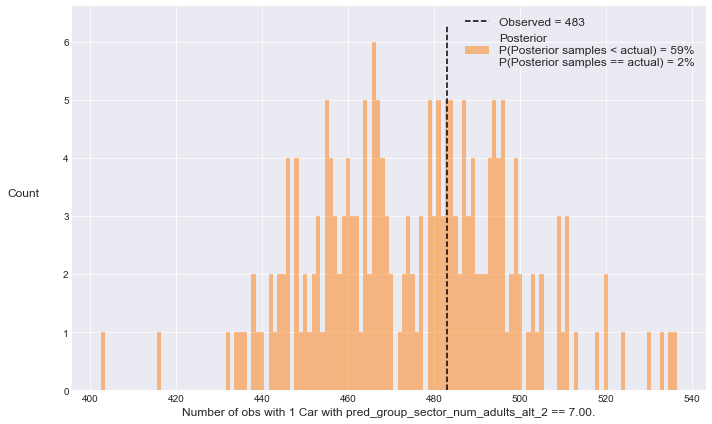

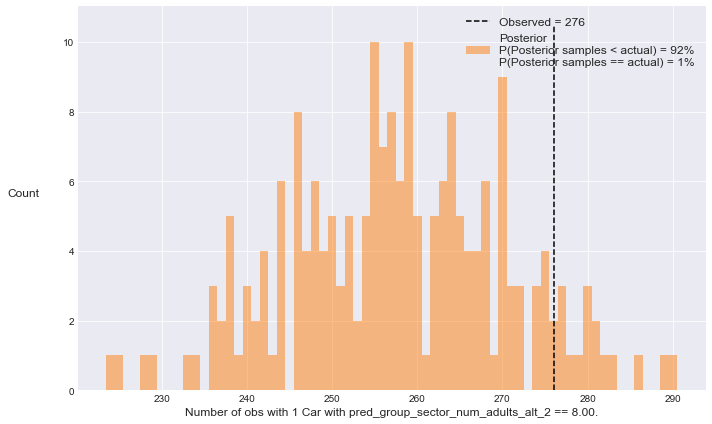

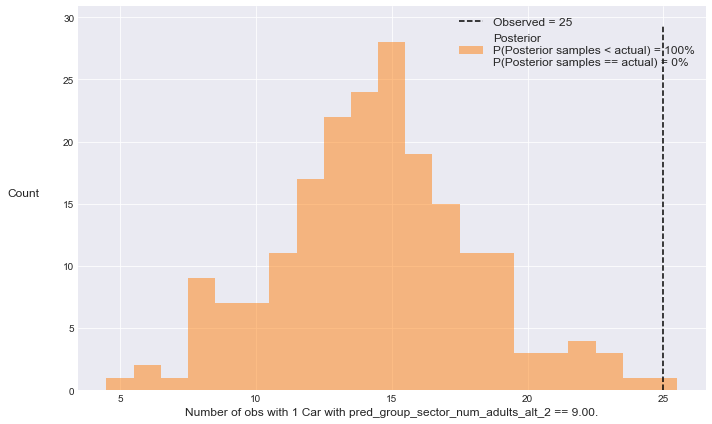

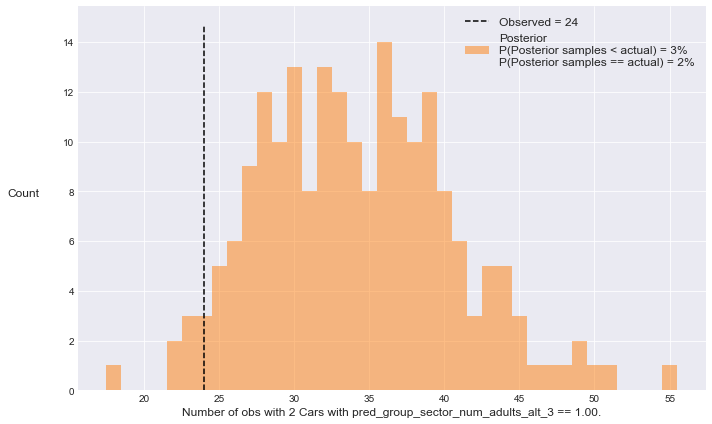

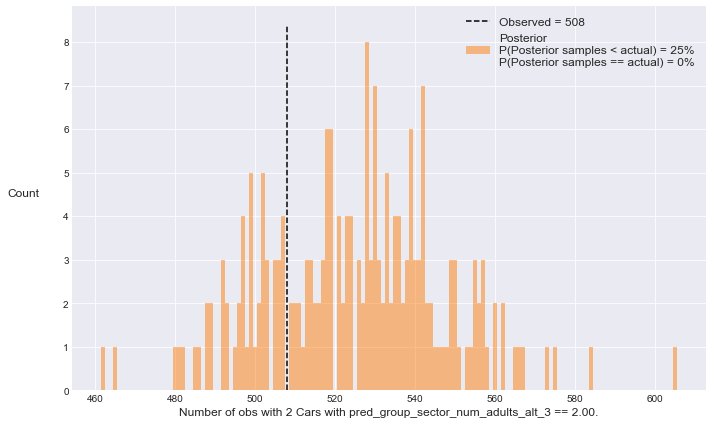

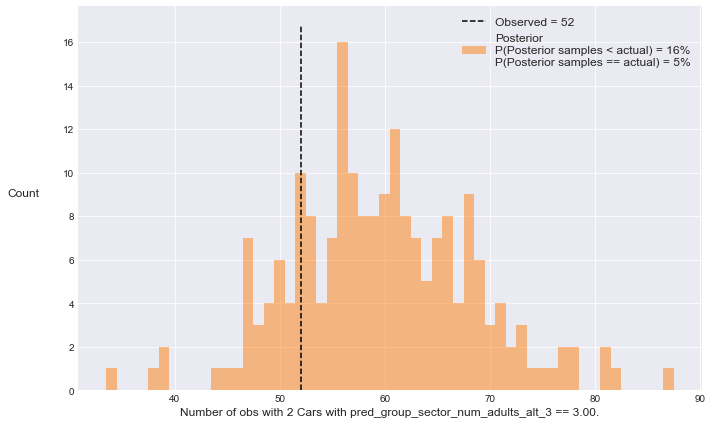

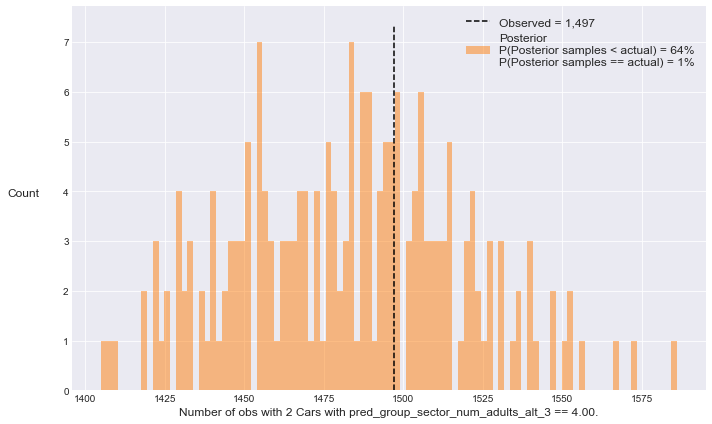

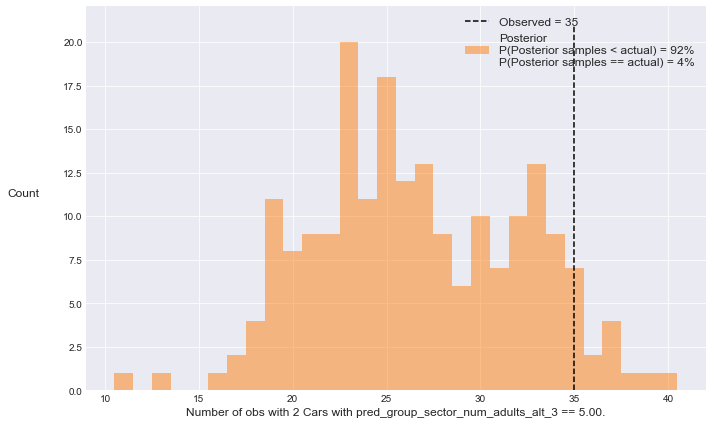

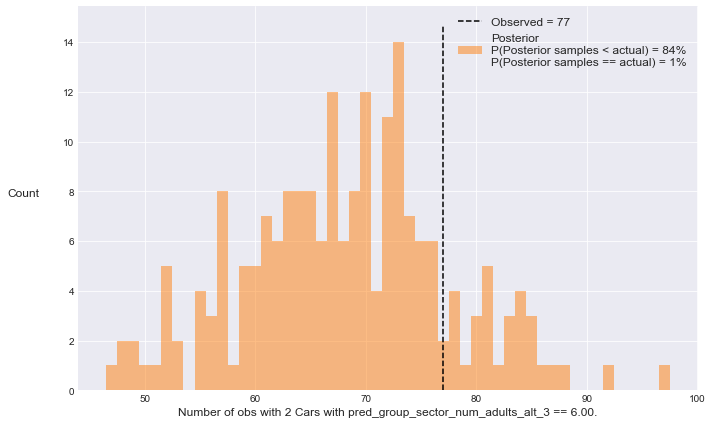

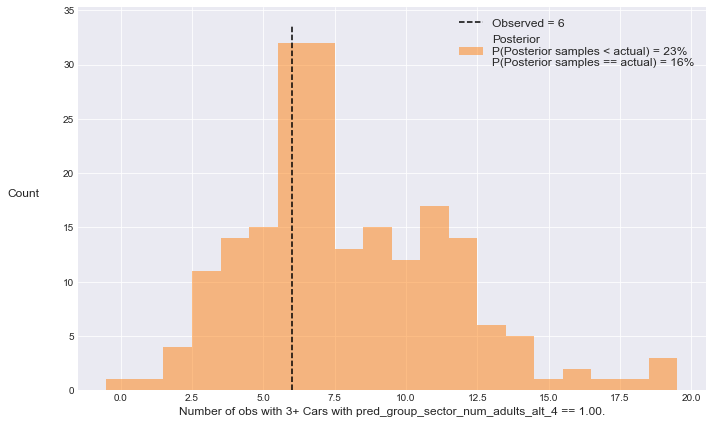

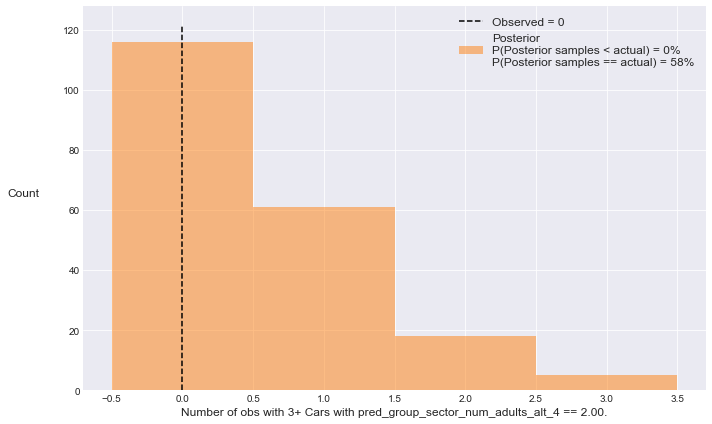

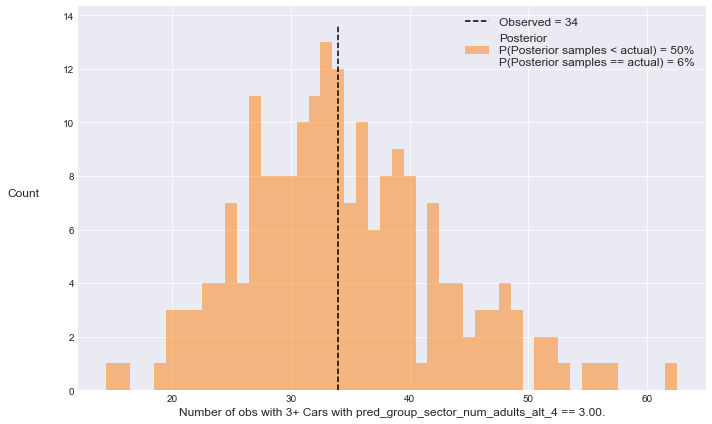

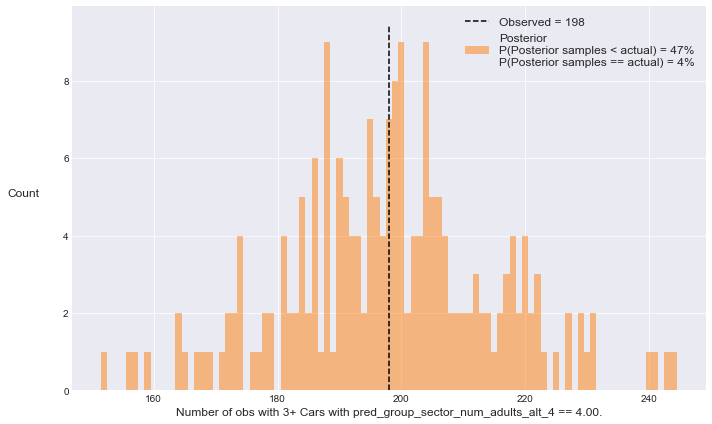

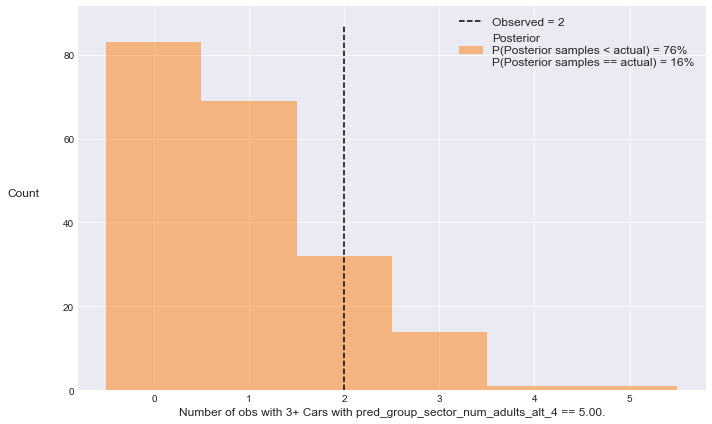

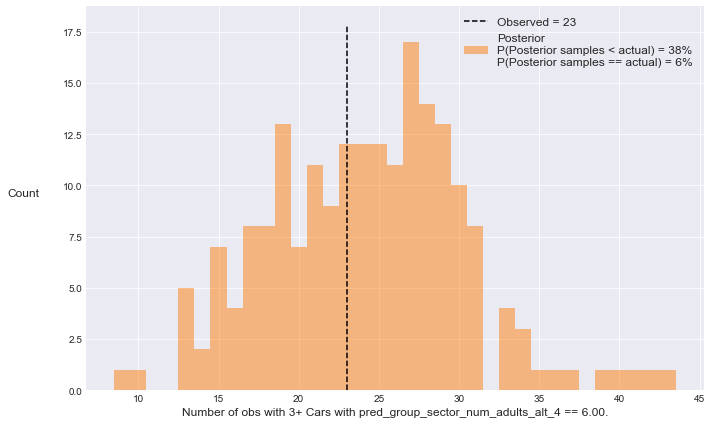

In [17]:
income_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols = [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]

cols_to_interact = [income_design_cols, sector_design_cols, adults_design_cols]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = sector_design_cols + adults_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=50, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)
    
    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_sector_num_adults_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array

    #Make the desired plot
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

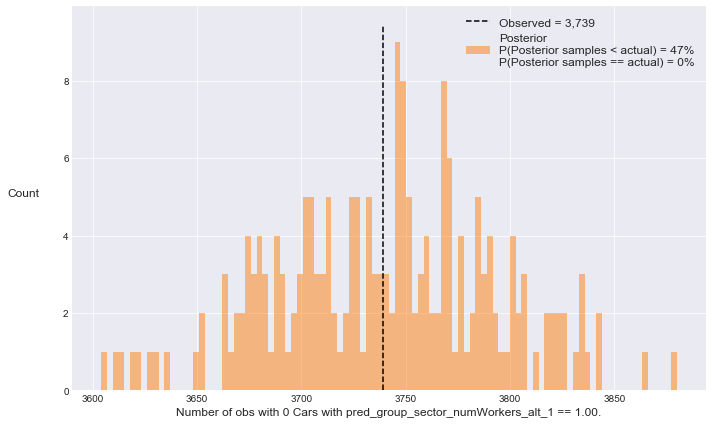

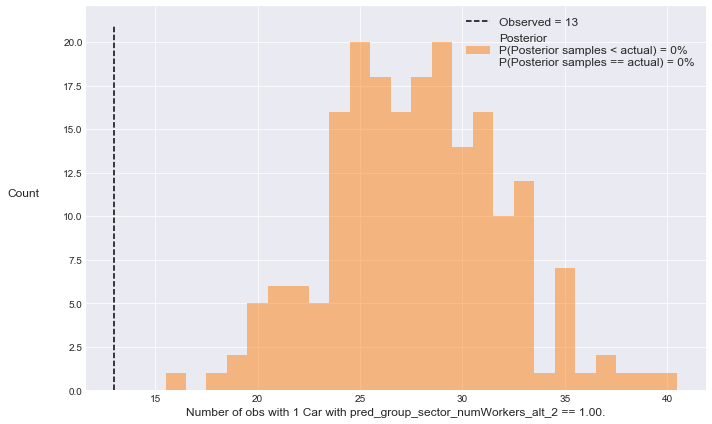

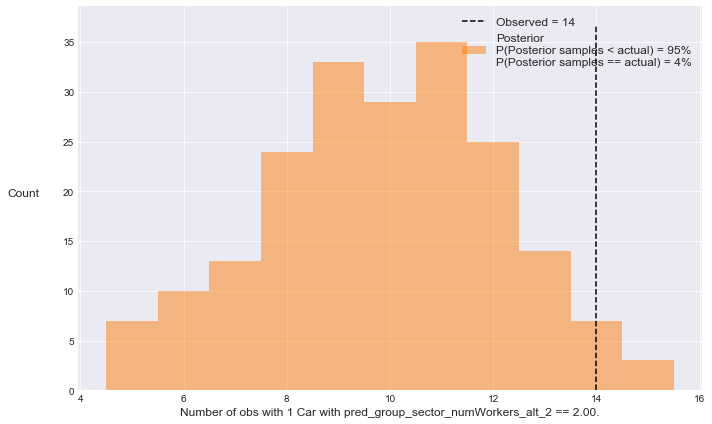

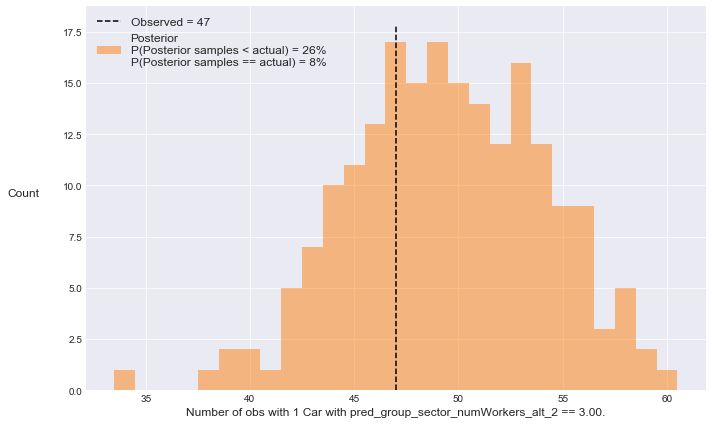

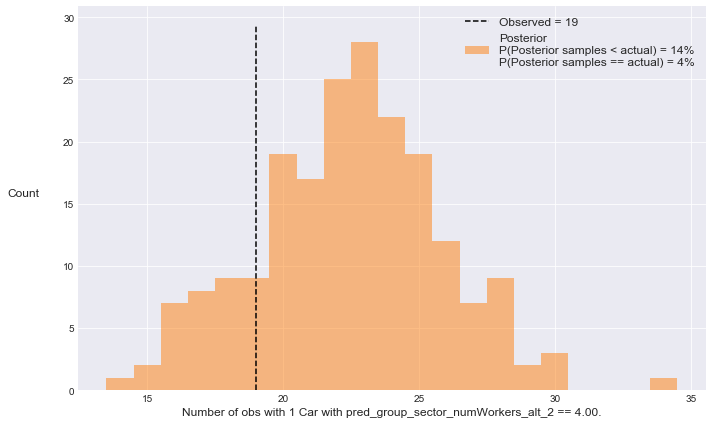

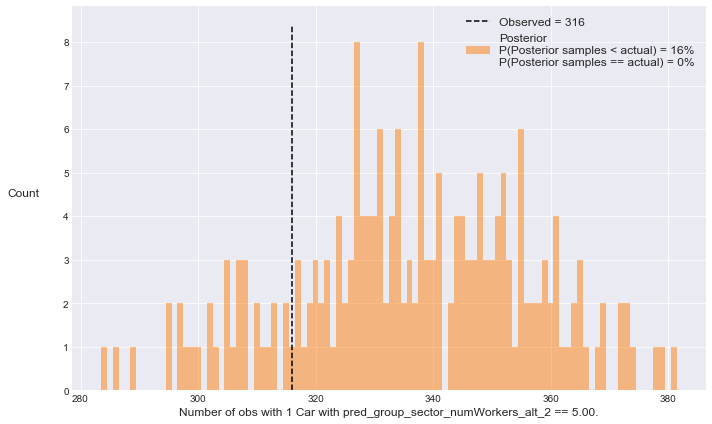

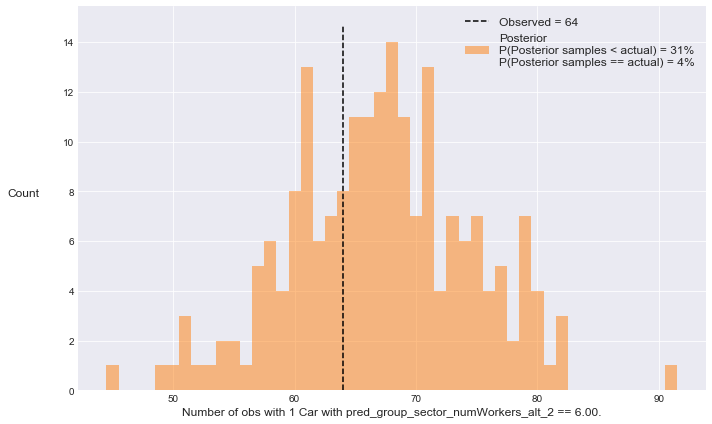

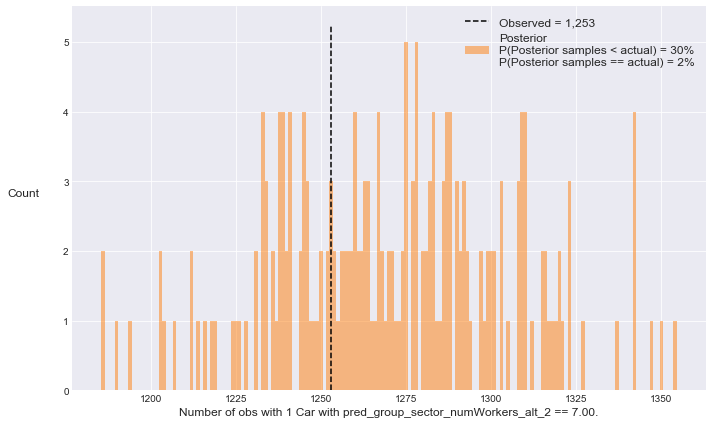

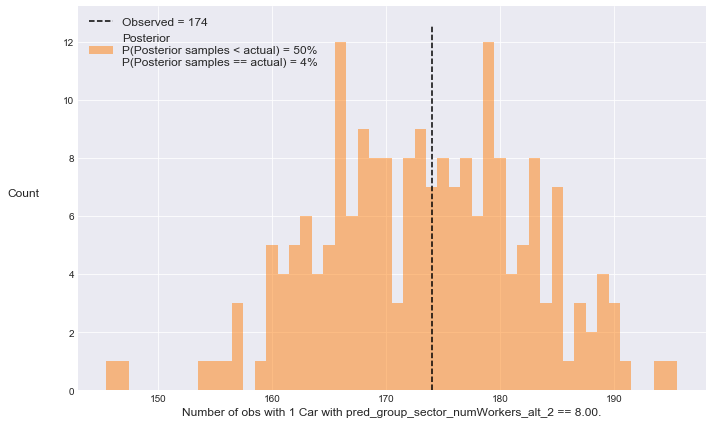

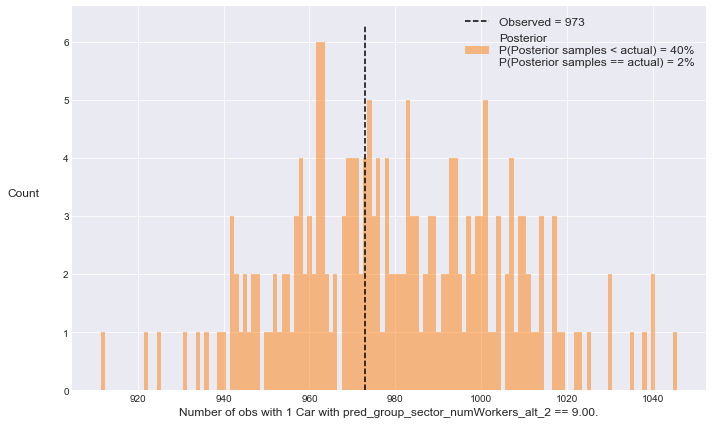

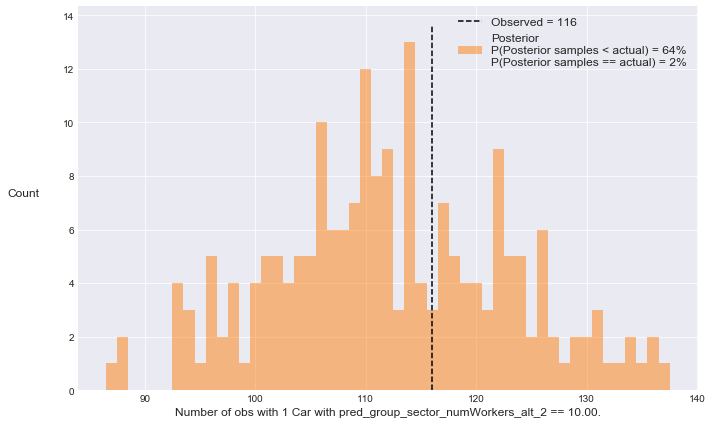

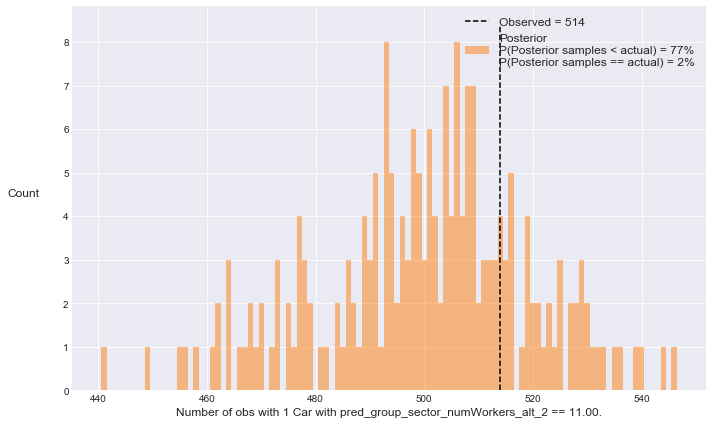

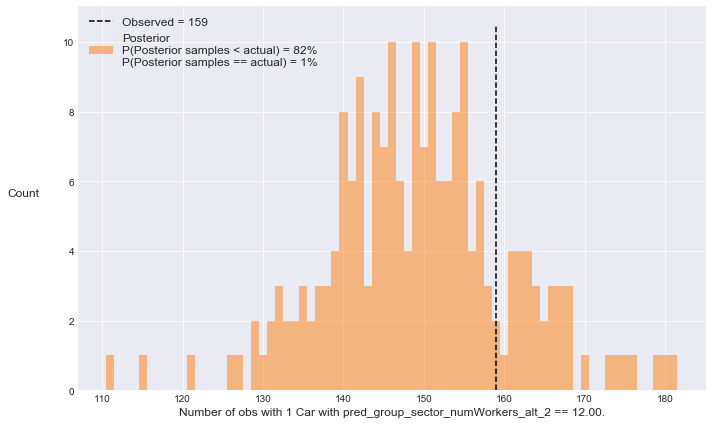

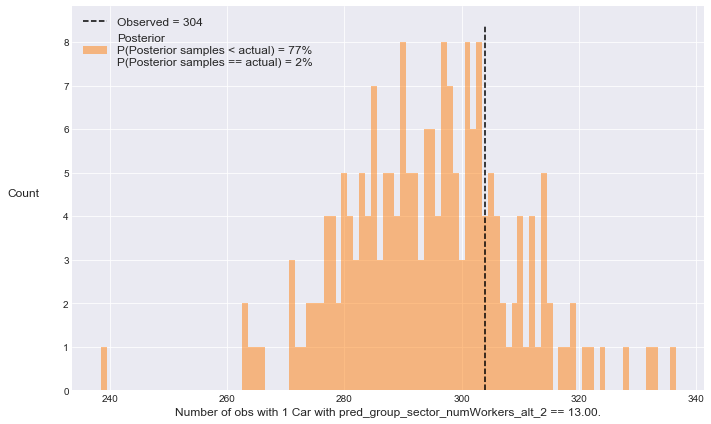

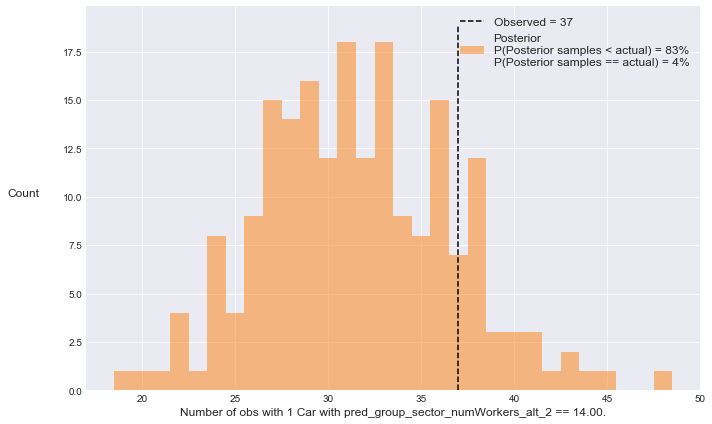

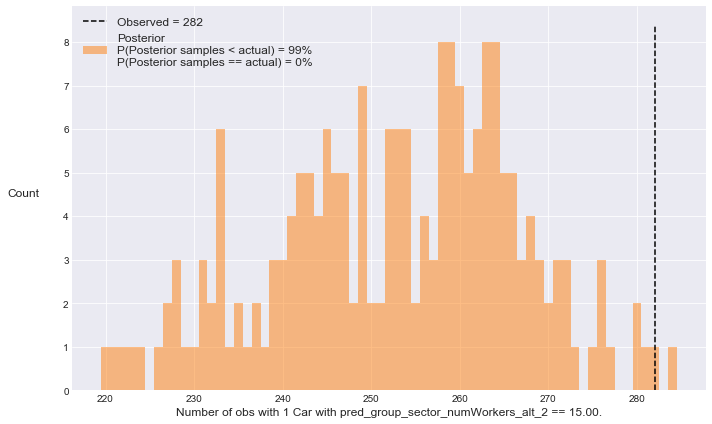

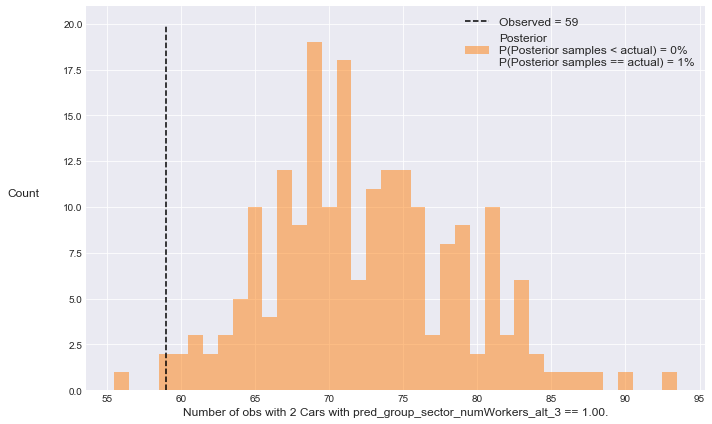

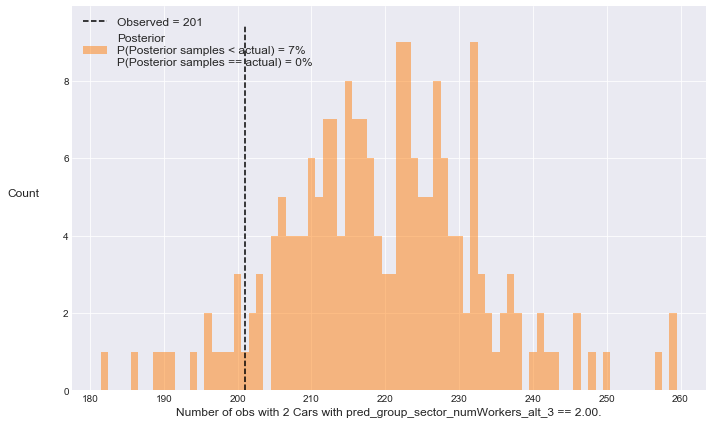

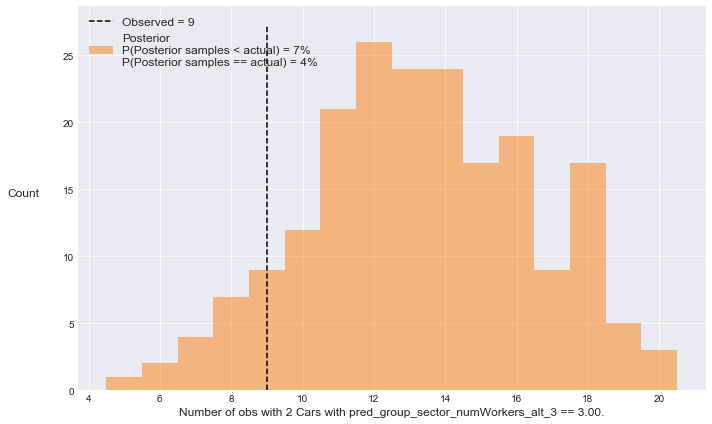

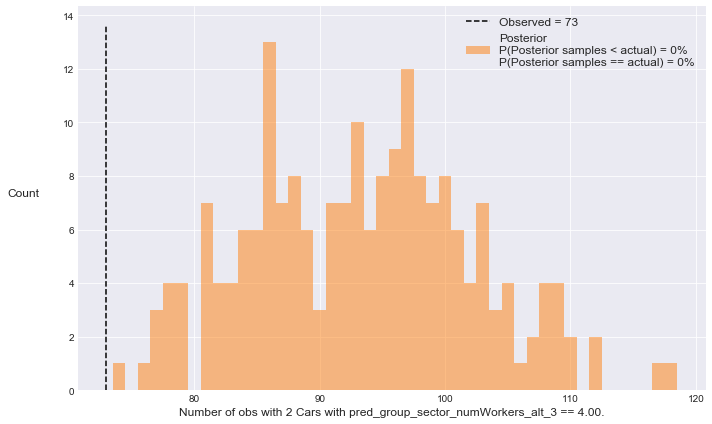

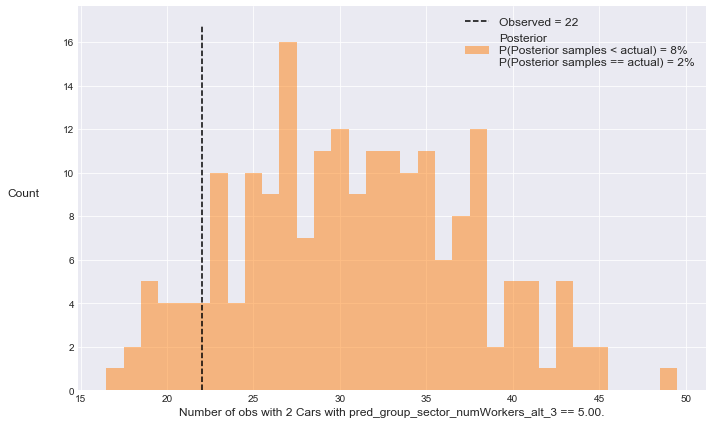

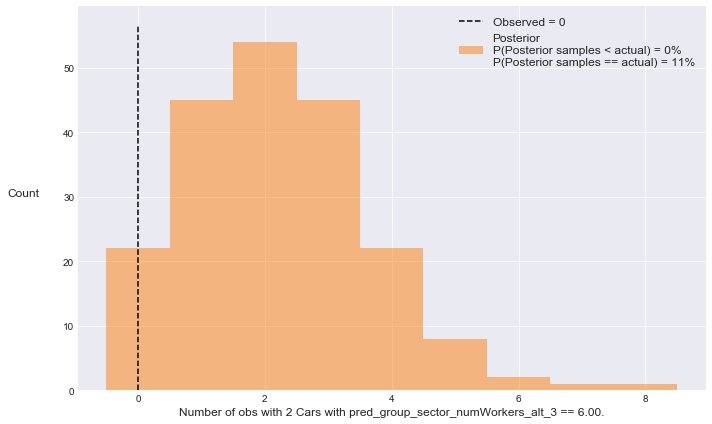

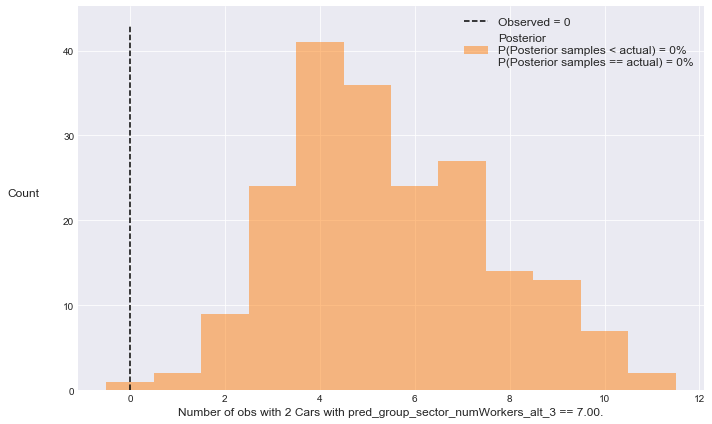

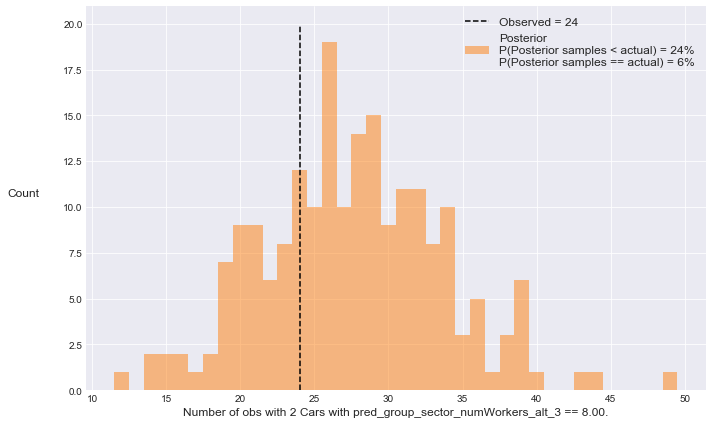

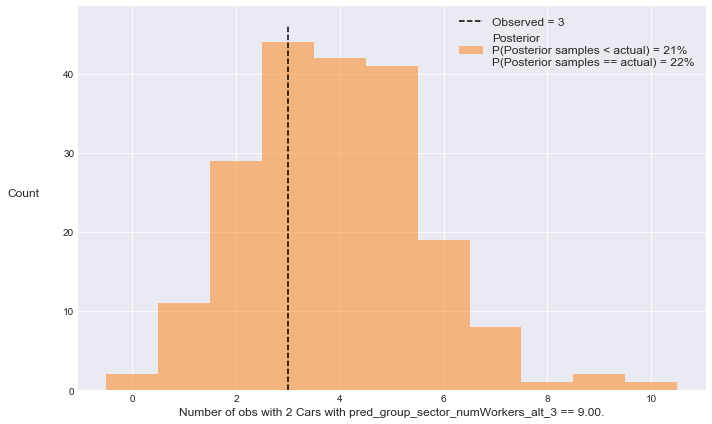

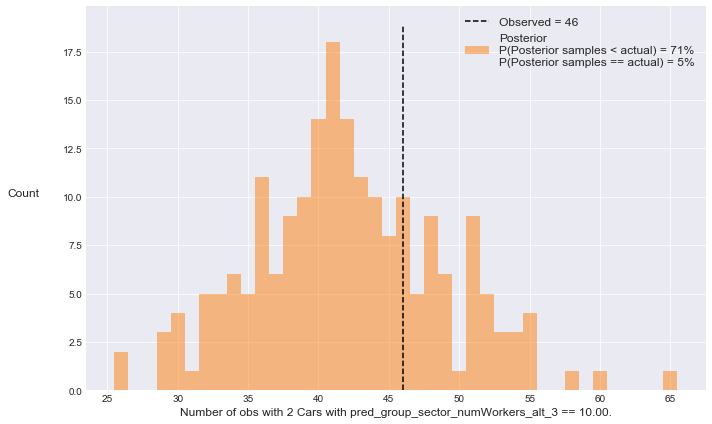

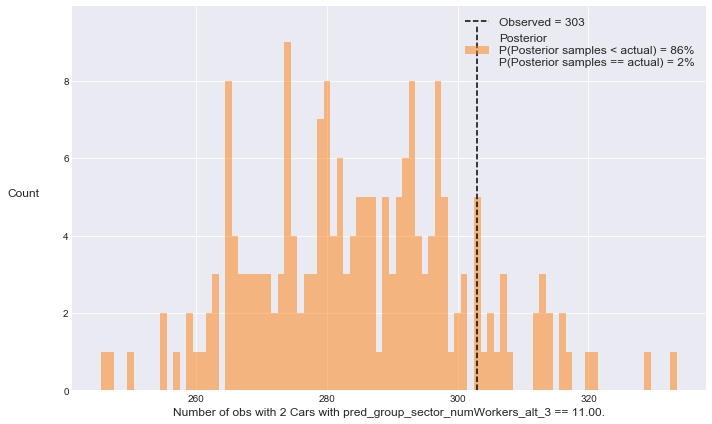

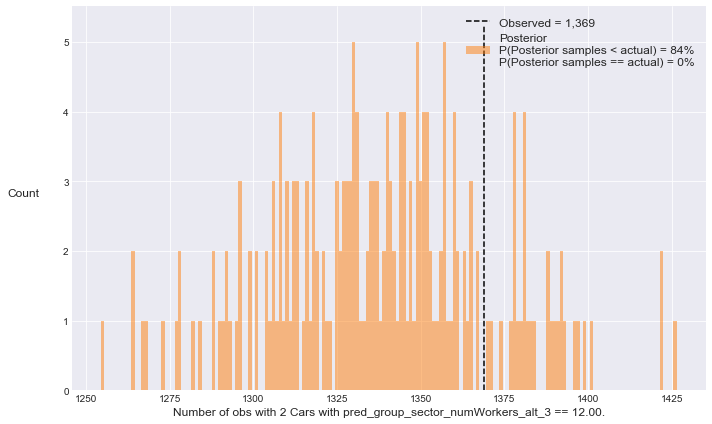

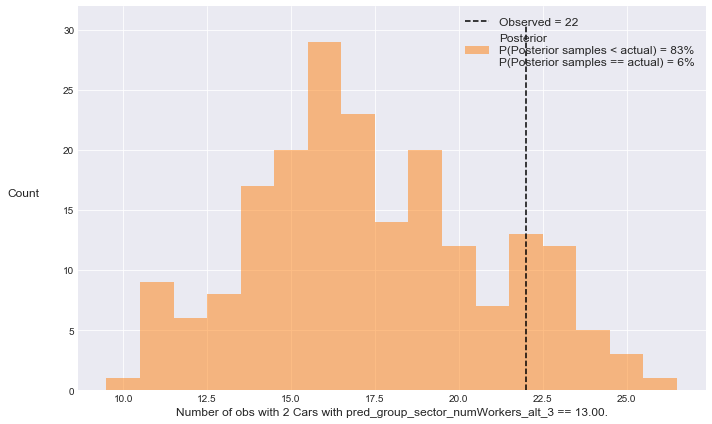

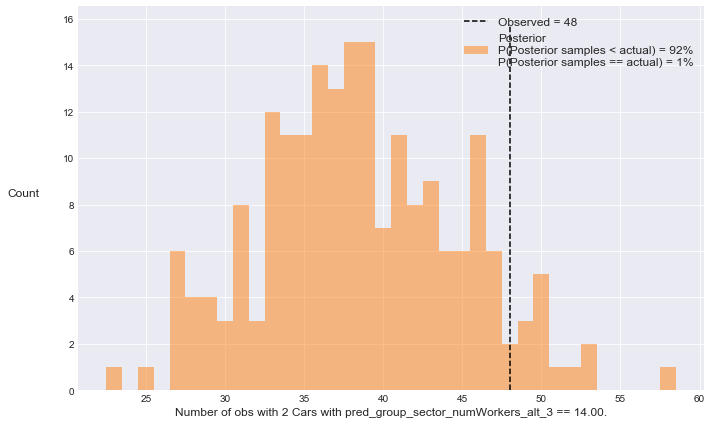

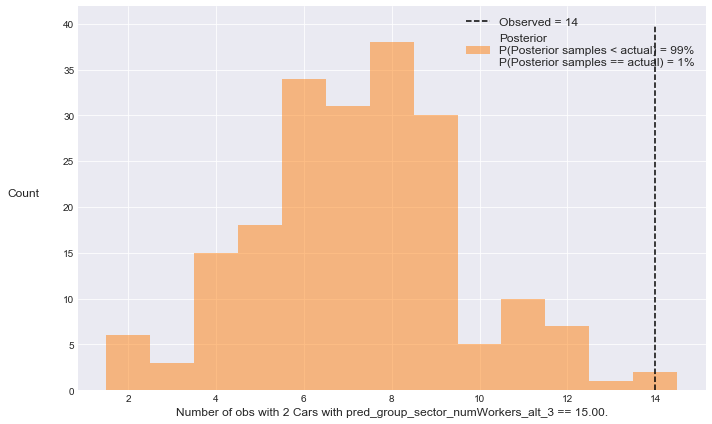

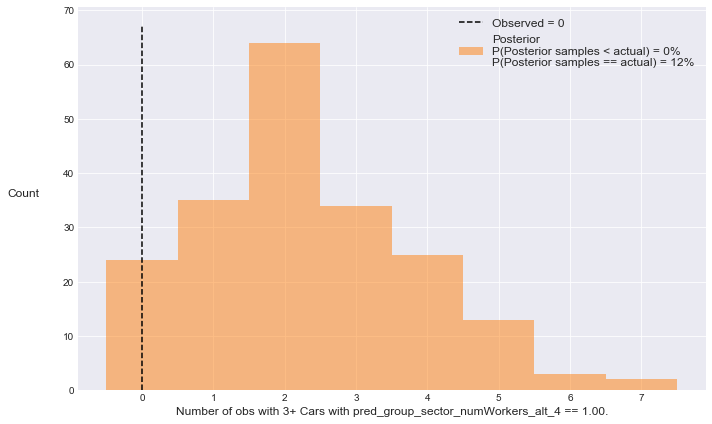

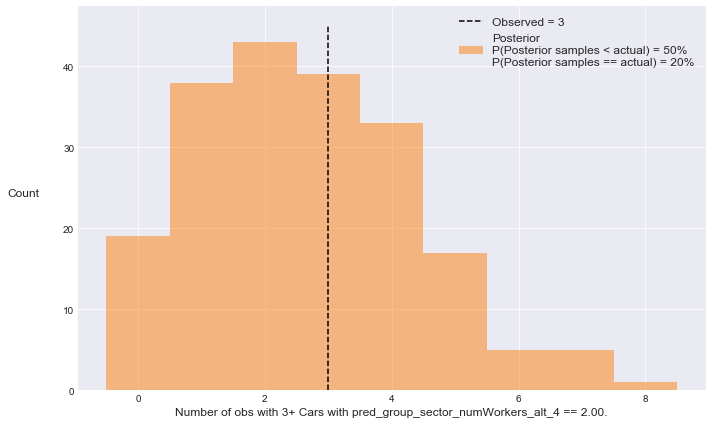

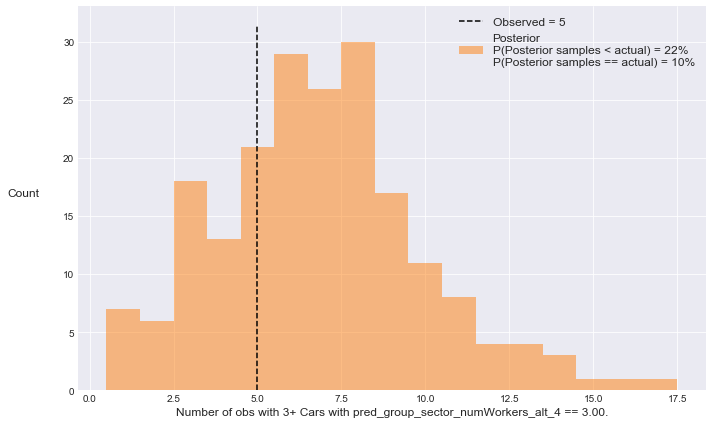

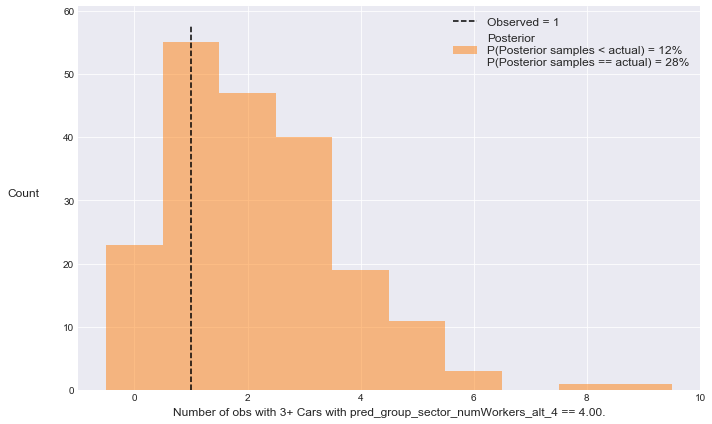

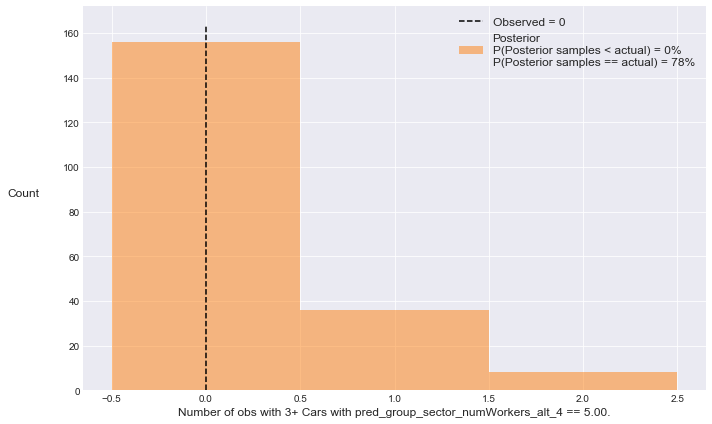

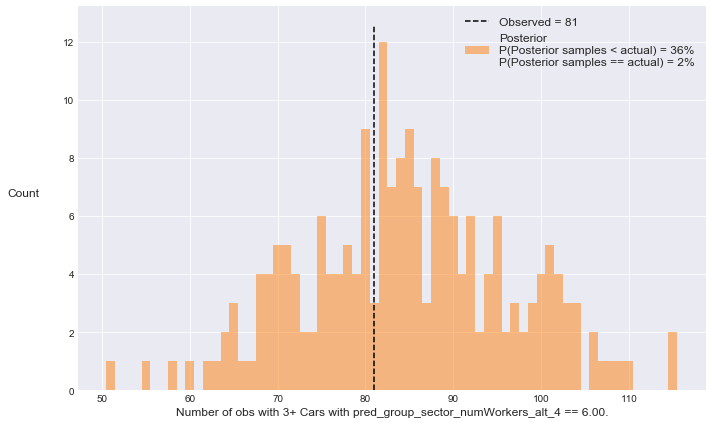

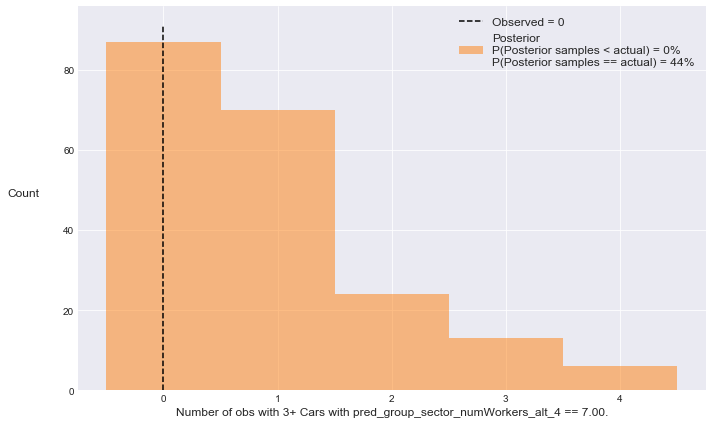

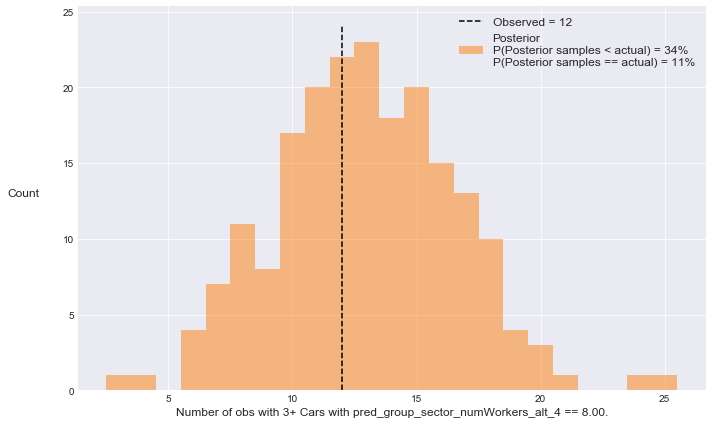

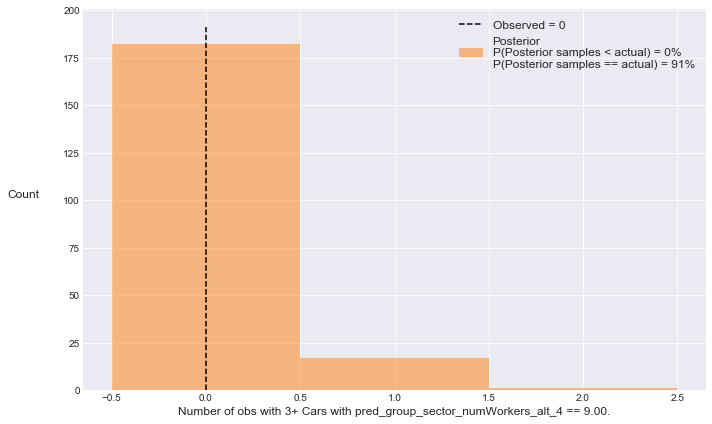

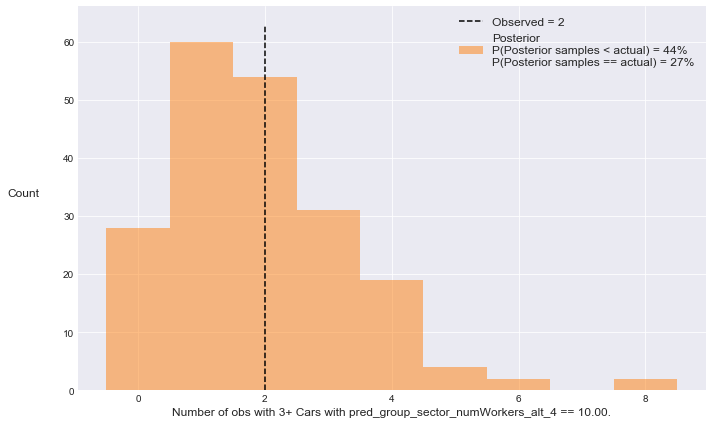

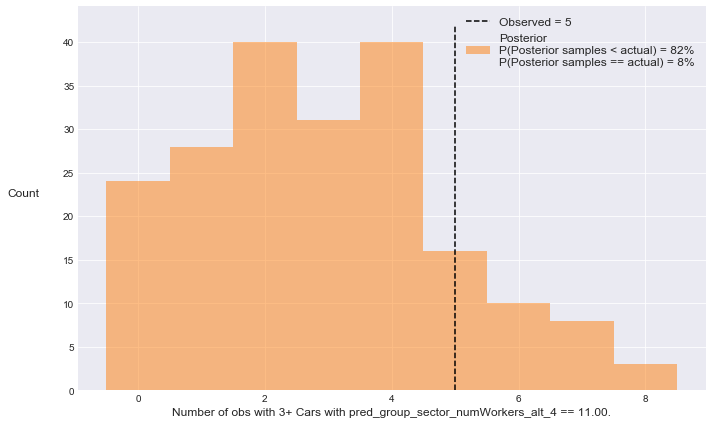

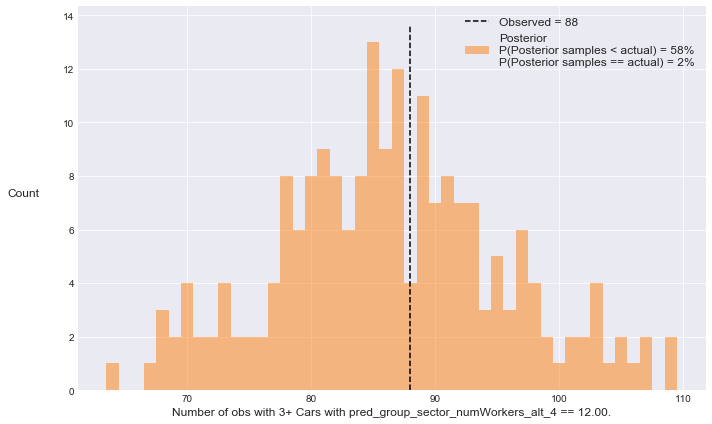

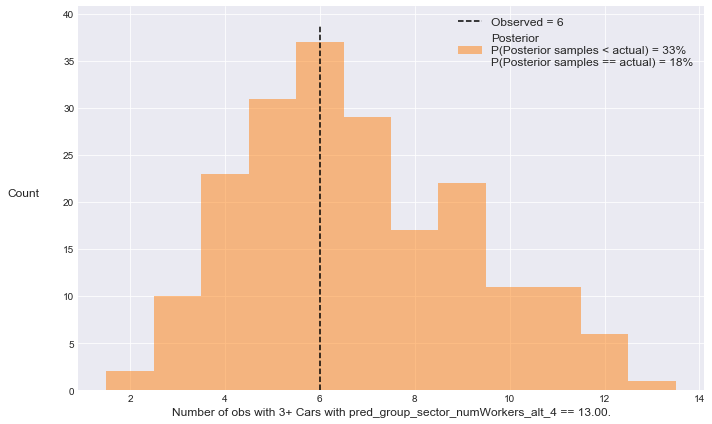

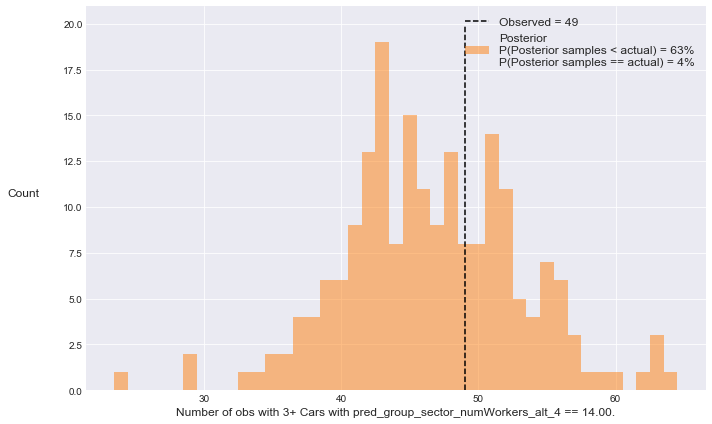

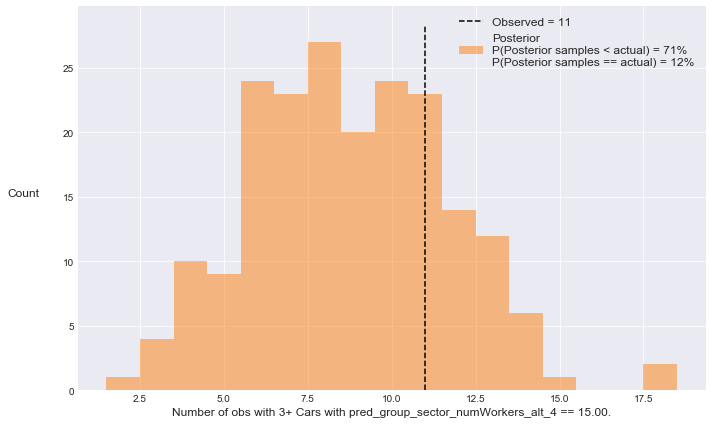

In [18]:

income_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]
worker_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'numWorkers' in x]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = sector_design_cols + worker_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=50, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)
    
    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_sector_numWorkers_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array

    #Make the desired plot
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

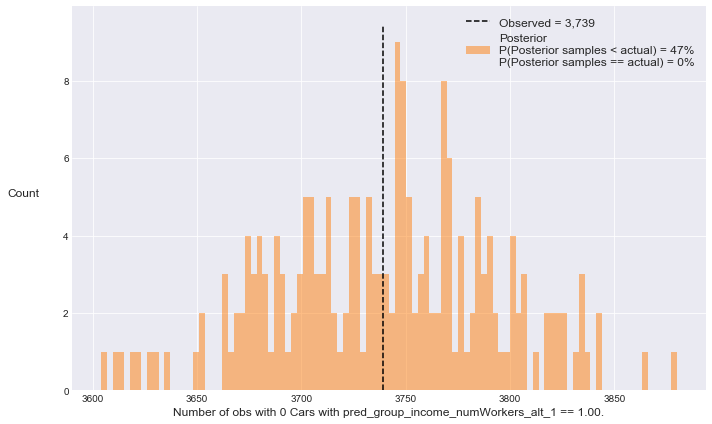

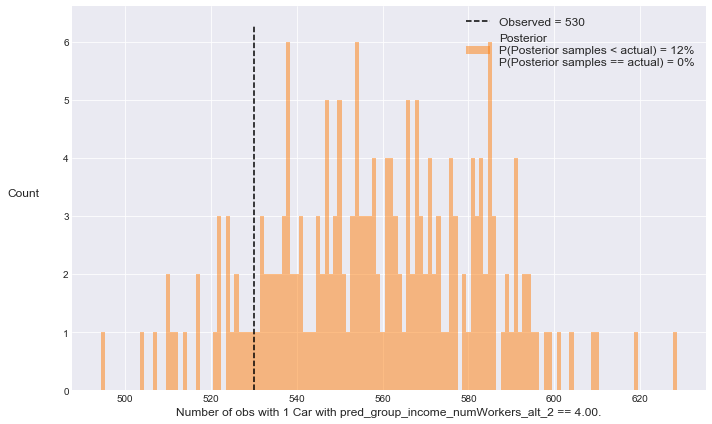

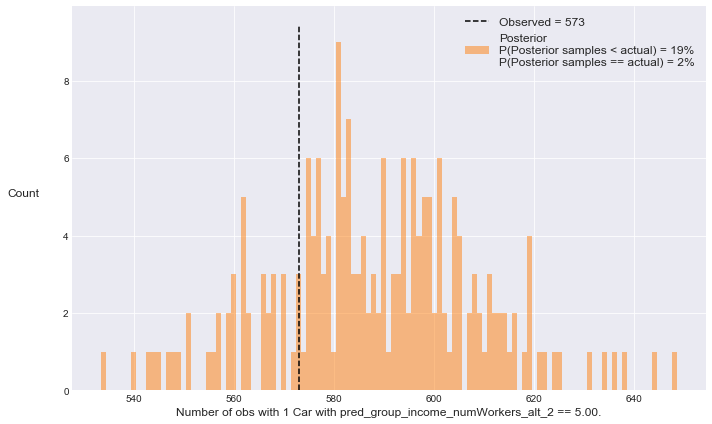

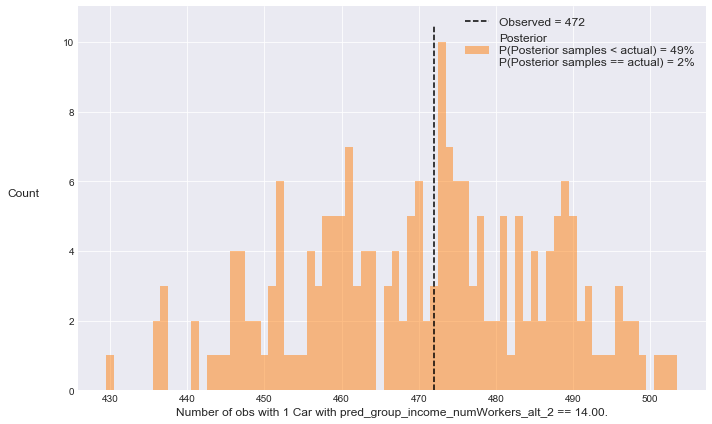

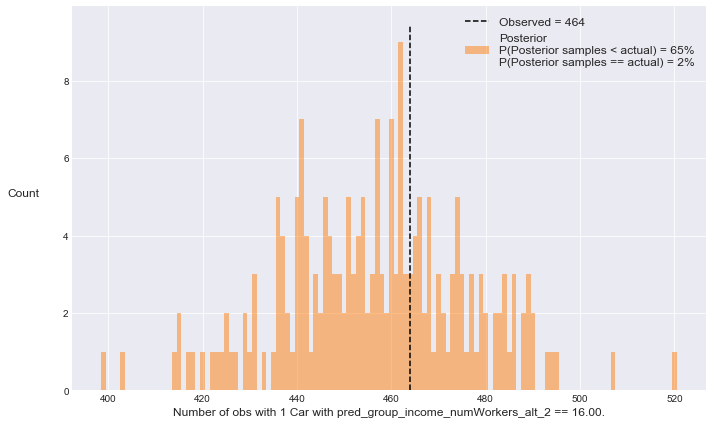

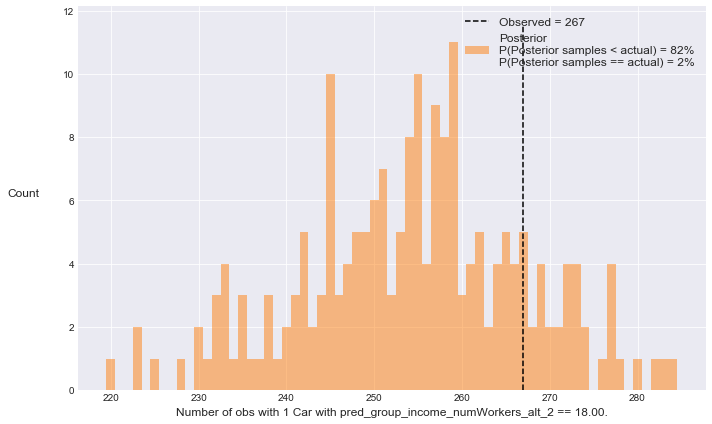

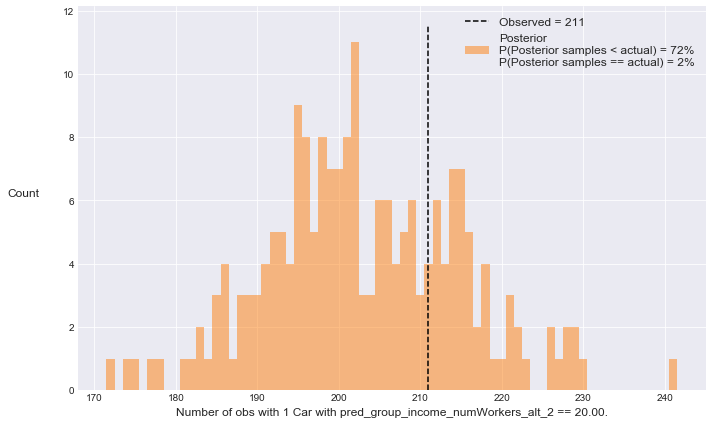

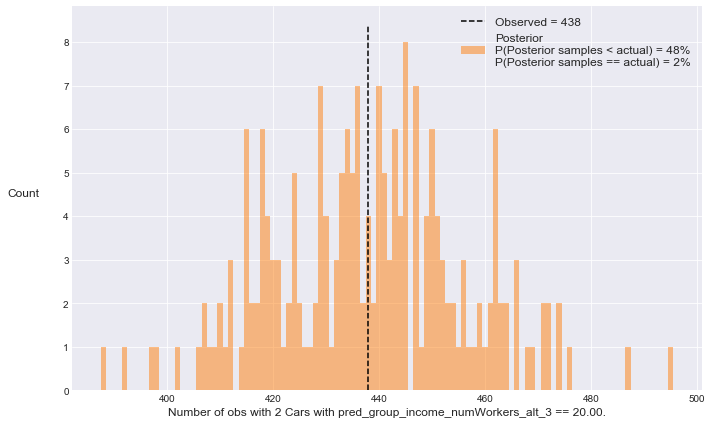

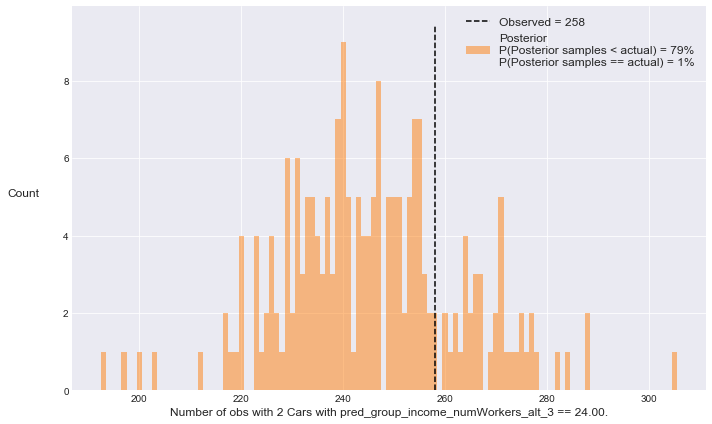

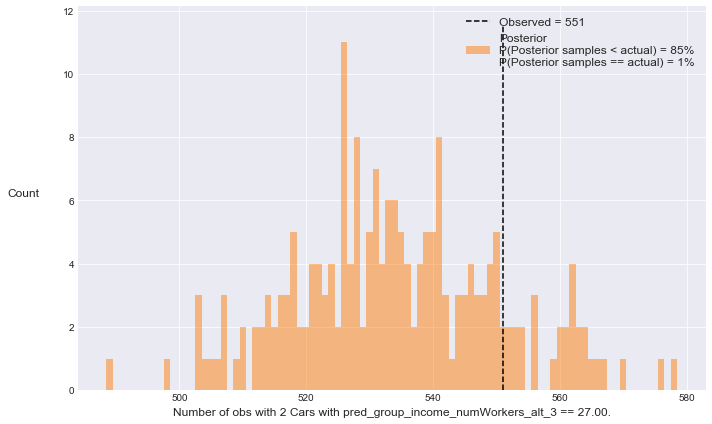

In [19]:

income_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]
worker_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'numWorkers' in x]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = income_design_cols + worker_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=50, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)
    
    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_income_numWorkers_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array

    #Make the desired plot
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        min_obs=200,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

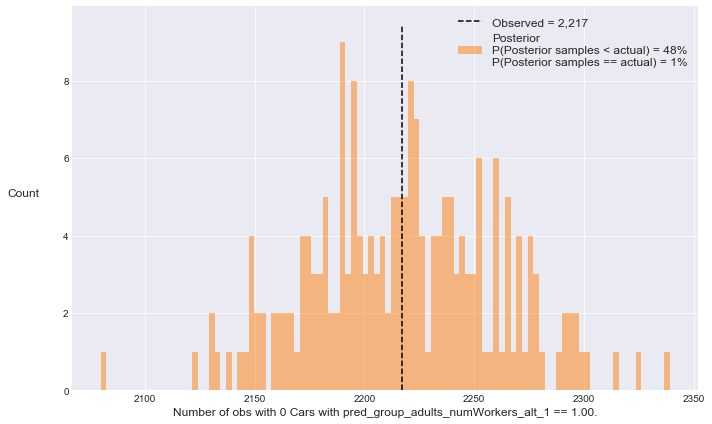

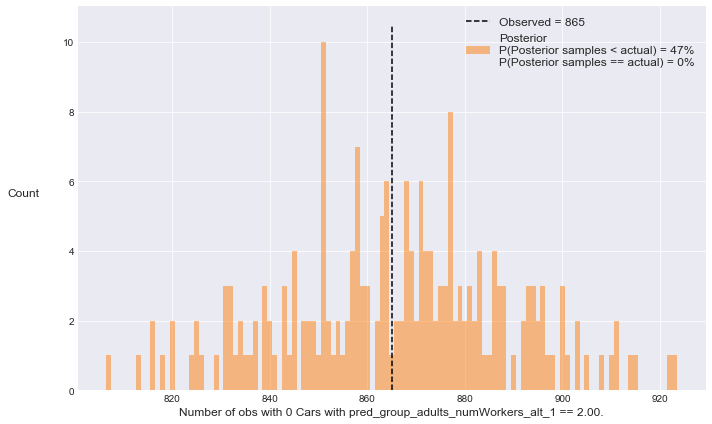

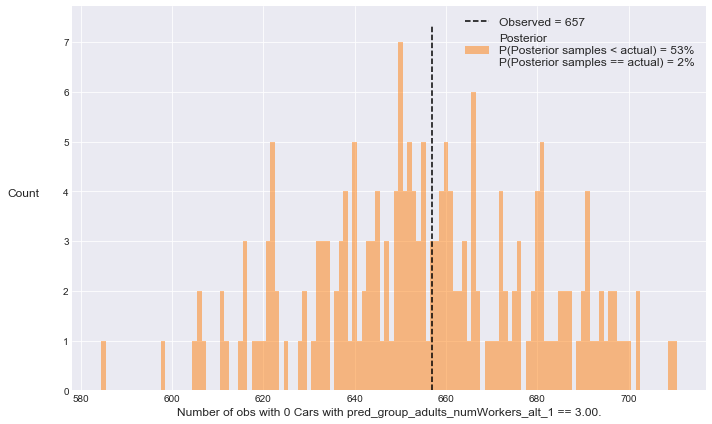

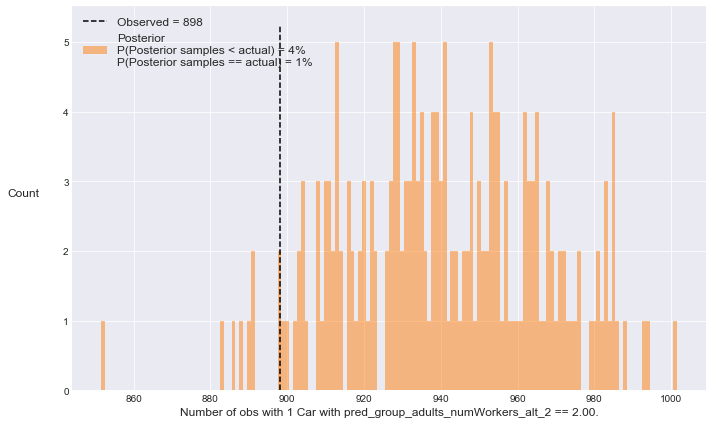

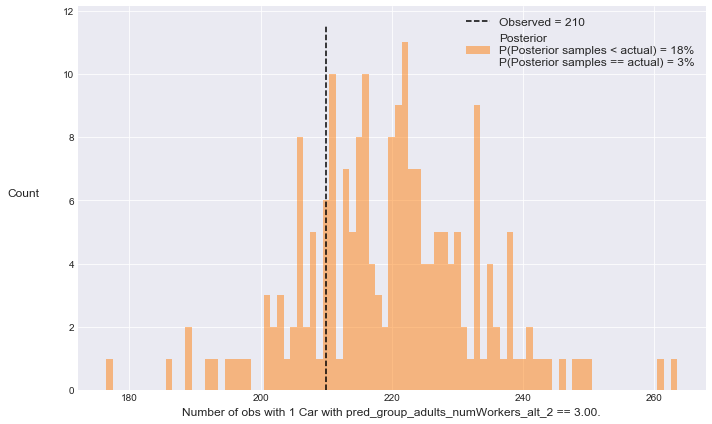

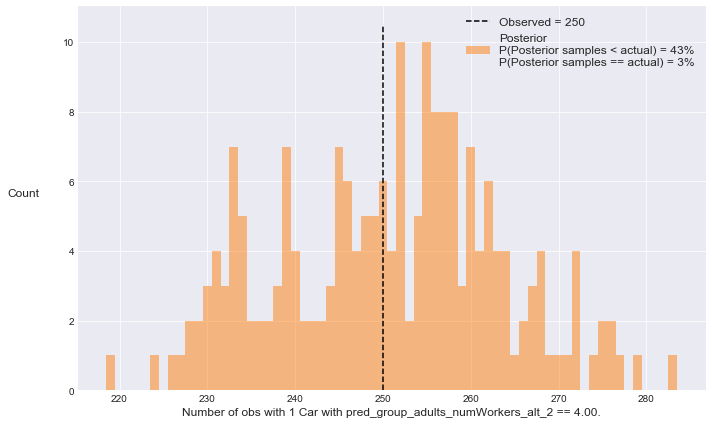

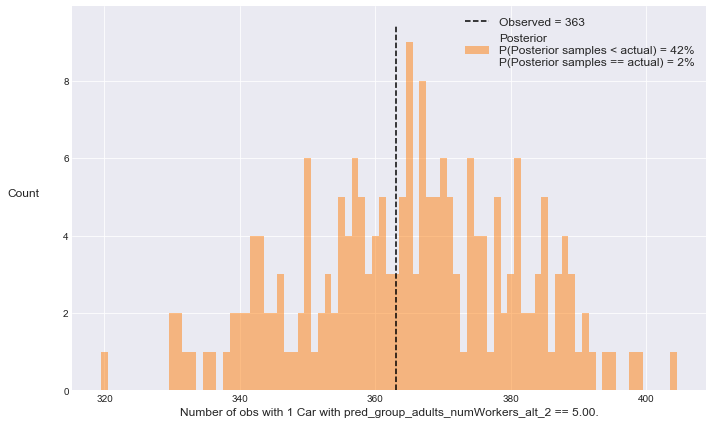

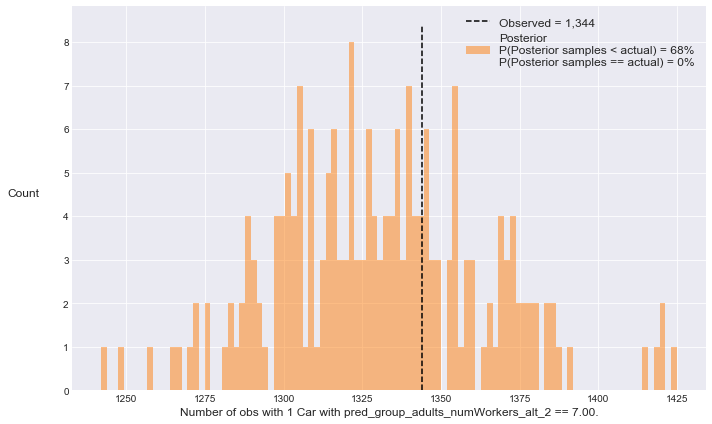

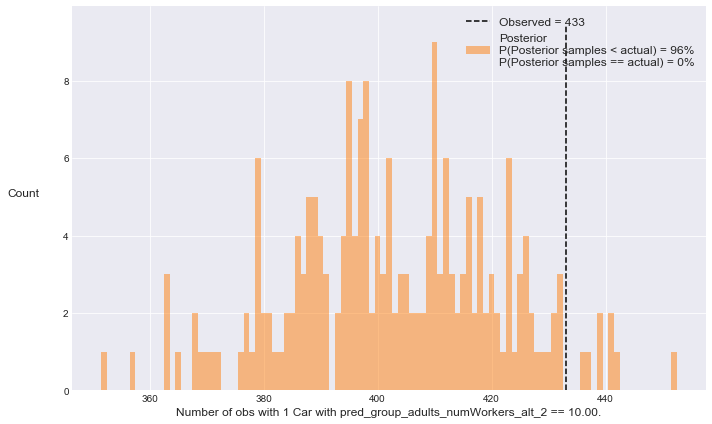

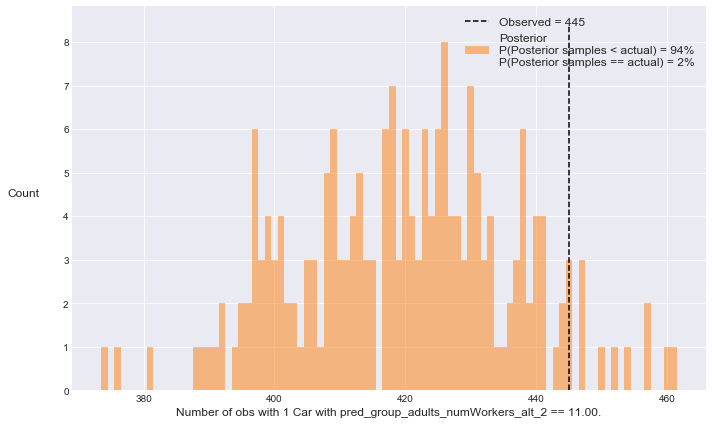

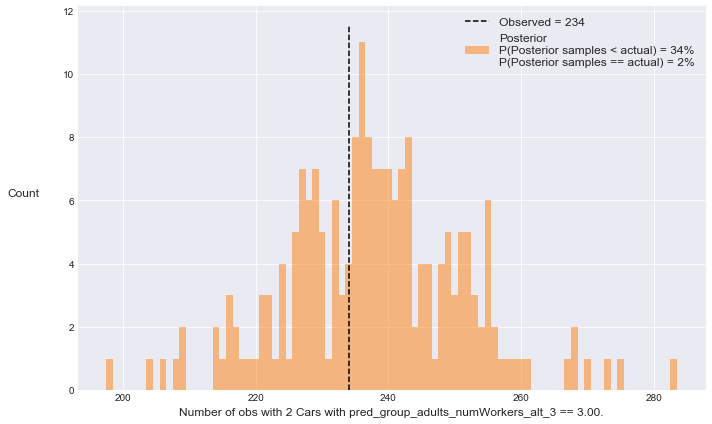

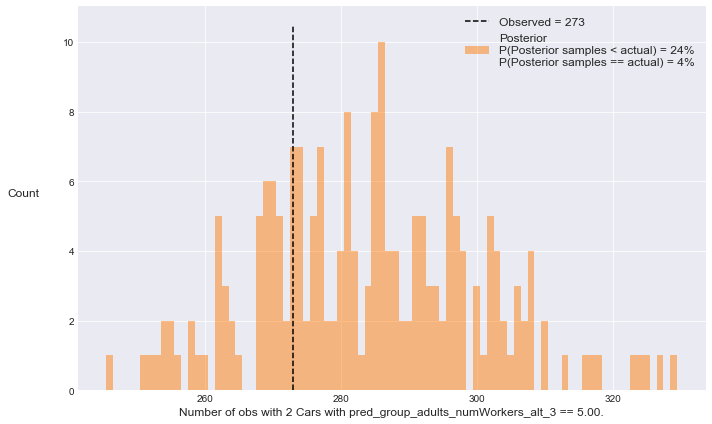

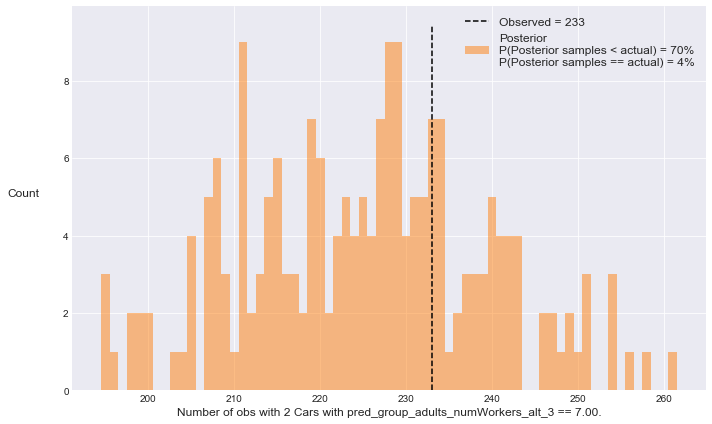

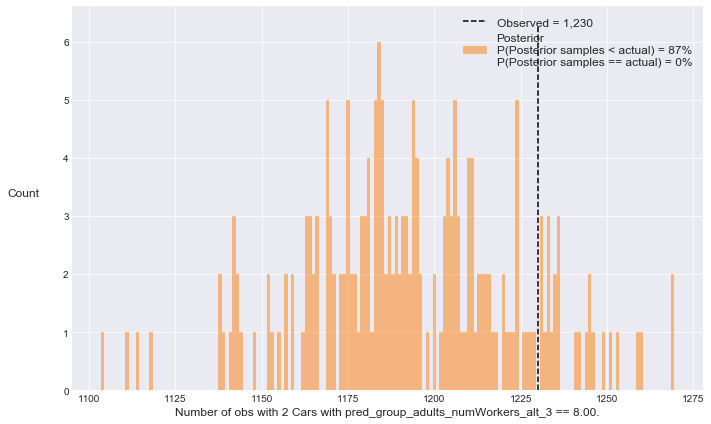

In [20]:

income_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'income' in x]
sector_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'sectr' in x]
adults_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'adults' in x]
worker_design_cols =\
    [i for i, x in enumerate(mnl_model.params.index.values) if 'numWorkers' in x]

# Look at the how the relationship betwen various combinations of income categories and
# sector are recreated (or not) by the simulations from the model
for alt in [1, 2, 3, 4]:
    # Determine the rows of the data that correspond to the current alternative
    alt_filter = train_alternative_ids == alt
    # Get the name of the current alternative
    alt_name = choice_labels[alt]

    # Filter the data to the current alternative's rows
    current_sim_y = sim_y[alt_filter, :]
    current_obs_y = mnl_model.choices[alt_filter]
    current_probs = mnl_model.long_fitted_probs[alt_filter]
    
    # Choose the columns whose interactions we wish to investigate
    col_list = adults_design_cols + worker_design_cols
    # Get the data corresponding to those columns
    current_raw_x = mnl_model.design[alt_filter, :][:, col_list]
    
    # Get the gradient of the current observations with respect to
    # the alternative specific constant.
    current_gradients = (current_obs_y - current_probs)
    # Build tree ensembles to predict the gradiend of the ASC
    # The idea comes from gradient boosting and from the notion of residual
    # analysis because we expect the gradient to not systematically differ from
    # zero with respect to any of the variables in the model.
    extra_tree =\
        ExtraTreesRegressor(
            n_estimators=400, min_samples_leaf=50, random_state=1139)
    extra_tree.fit(current_raw_x, current_gradients)
    extra_tree_preds = extra_tree.predict(current_raw_x)
    
    # Get the rank order of the gradients since we're dealing with discrete data
    # and just want to see if the pattern between observed choices and the combinations
    # adequately represented. Besides, it's hard to read the axes labels when plotting
    # the predicted gradients directly.
    current_unique_preds = np.sort(np.unique(extra_tree_preds))
    pred_rank_idx = dict(zip(current_unique_preds, np.arange(1, current_unique_preds.size + 1)))
    pred_rank_array =\
        np.fromiter((pred_rank_idx[pred] for pred in extra_tree_preds), dtype=int)
    
    # Initialize a new column to save the predictions
    prediction_col_name = 'pred_group_adults_numWorkers_alt_{}'.format(alt)
    train_df_all[prediction_col_name] = 0
        
    # Save the prediction ranks (aka categories) for later use
    train_df_all.loc[alt_filter, prediction_col_name] = pred_rank_array

    #Make the desired plot
    viz.plot_discrete_scalars(
        train_df_all,
        None,
        sim_y,
        prediction_col_name,
        alt_filter,
        mnl_model.choices,
        min_obs=200,
        figsize=(10, 6),
        filter_name='obs with {}'.format(alt_name)
    )

In [21]:
# Save the data with the predictions from the various extra trees
train_df_all.to_csv(
    './data/mnl_training_data_long_model_checking_data.csv',
    index=False)

In [22]:
sorted(train_df_all.columns.tolist())

['ACCESS4',
 'ACCESS5',
 'ACCESS6',
 'X1',
 'altid',
 'auto_access',
 'choiceBoolean',
 'hh_auto_dep',
 'hhcrd',
 'hhidu',
 'hhsize',
 'hhtaz',
 'hhveh',
 'incom',
 'income_1',
 'income_2',
 'income_4',
 'income_5',
 'income_gt_5',
 'intercept',
 'non_mot_access',
 'numWorkers',
 'num_adults',
 'num_adults_eq_2',
 'num_adults_gte_3',
 'own',
 'pktno',
 'pred_group_adults_numWorkers_alt_1',
 'pred_group_adults_numWorkers_alt_2',
 'pred_group_adults_numWorkers_alt_3',
 'pred_group_adults_numWorkers_alt_4',
 'pred_group_income_numWorkers_alt_1',
 'pred_group_income_numWorkers_alt_2',
 'pred_group_income_numWorkers_alt_3',
 'pred_group_income_numWorkers_alt_4',
 'pred_group_income_num_adults_alt_1',
 'pred_group_income_num_adults_alt_2',
 'pred_group_income_num_adults_alt_3',
 'pred_group_income_num_adults_alt_4',
 'pred_group_income_sector_alt_1',
 'pred_group_income_sector_alt_2',
 'pred_group_income_sector_alt_3',
 'pred_group_income_sector_alt_4',
 'pred_group_sector_numWorkers_alt_1',

 # Analysis of Model Checking Plots for the MNL model
 
Overall, from the log-predictive plots, the model is actually performing decently. The favorable impressions mostly continues when looking at the reliability plots and when looking at the marginal model plot for `trans_access`.

The first takeaway is that since the marginal relationship between the choices and `trans_access` (the only continuous variable in the dataset) is mostly well represented, there is likely little benefit from using methods such as neural networks that primarily work using smooth transformations of the input variables.

Moving on, I looked at the categorical variables. No effort was made to look at the marginal relationships of the categorical variables as those will automatically be well fit due to the model being 'saturated'. Instead, I directly started by looking at pairs of the categorical variables.

Getting straight to the conclusion, the bivariate relationships between the categorical variables and the choices is poorly fit for some alternatives and pairs of variables. This is likely due to the model having no interaction terms between the categorical variables. The lack of fit plus the fact that most of the variables in the dataset are categorical helps explain why the random forest (which is well known to perform well on categorical datasets) performed so much better than the MNL.

In particular, using the plots above, we can realize that at least a handful of specific interactions between the following variables should definitely be included:
- income and sector for 1 Car
- income and number of adults for 1 Car and 2 Cars
- sector and number of adults for 1 Car and 2 Cars

Instead of enumerating each of the categories in human readable form, I'm simply going to
- add the required dummy variables to the associated systematic utility function,
- see how that model performs in-sample  relative  to the model from this notebook,
- and then see how the interaction-enhanced model performs in the notebook used by the authors to generate the initial results.